# Проект: Телеком - Поиск клиентов с неоптимальными тарифами

# Материалы

- [Презентация](https://drive.google.com/file/d/19O0HbcJa3yJDHA9ESKFr7S91R-3dVxcp/view?usp=sharing)
- [Дашборд](https://public.tableau.com/app/profile/ann7269/viz/Telecom_16693154522000/Dashboard1?publish=yes)
- [Выгрузка клиентов с рекомендуемыми тарифами](https://docs.google.com/spreadsheets/d/1huuLvKwSYR9_PXkfPKmIjTC93MQu7rG2/edit?usp=sharing&ouid=100386371217527628149&rtpof=true&sd=true)

## Введение

В данном проекте будет произведён анализ действующих клиентов компании "Нупозвони", их активности и оптимальности используемых ими тарифов, а также выручки компании "Нупозвони" на основании данных о текущих тарифах действующих клиентов и о совершаемых/принимаемых ими вызовах. В итоге должны быть выявлены активные клиенты, проанализировано, насколько эффективно они расходуют свои тарифы, подобраны более оптимальные тарифные планы. Перевод клиентов на более оптимальные тарифы позволит снизить вероятность оттока действующих клиентов к другим операторам связи. Также необходимо изучить текущую выручку компании "Нупозвони", её возможное снижение вследствие перевода клиентов на другие тарифы, и в результате предложить решение для минимизации риска её падения.

Коммерческим директором компании "Нупозвони" нам предоставлены данные о клиентах компании и совершаемых ими звонках. Клиентами компании являются организации, использующие услугу виртуальной телефонии (услуга подразумевает возможность распределения входящих вызовов между свободными операторами, а также совершение исходящих вызовов как между операторами, так и клиентам организаций). В рамках проекта необходимо выявить активных клиентов компании "Нупозвони", которые переплачивают, используя текущий тариф, и предложить им более выгодный с целью их удержания.

**Цель проекта:**

На основе данных о совершаемых вызовах клиентов и об их тарифах, предоставленных коммерческим директором, выявить активных клиентов, использующих свой тариф неэффективно; подобрать для них более оптимальный тариф. Одновременно необходимо исследовать выручку компании, её потенциальное значение после смены тарифов, и минимизировать возможные потери.

**Задачи проекта:**

Задачи, которые необходимо решить в рамках проекта:

1. Выполнить предобработку данных;
2. Определить критерии, по которым клиенты будут считаться активными;
3. Проанализировать текущие расходы активных клиентов на связь и их динамику;
4. Рассчитать расходы активных клиентов на связь при условии использования ими других тарифов;
5. Определить разницу в расходах активных клиентов при текущем тарифе и более выгодном(-ых) (в абсолютных и относительных значениях);
6. Определить тарифы, которые необходимо предложить клентам;
7. Рассчитать текущую выручку компании;
8. Рассчитать выручку компании при условии перехода активных клиентов на более выгодные тарифы; рассчитать разницу обоих типов выручки в абсолютных и относительных значениях;
9. Сформулировать рекомендации по минимизации потерь в выручке;
10. Проверить следующие статистические гипотезы:
    - Средняя длительность исходящих звонков на тарифе А равна средней длительности исходящих звонков на тарифе С;
    - Средняя длительность исходящих звонков клиентов с количеством операторов до 10 включительно равна средней длительности исходящих звонков клиентов с количеством операторов более 41 включительно;
11. Подготовить презентацию для заказчика на основе полученных выводов;
12. Предоставить выгрузку клиентов с текущим и предлагаемым тарифами для дальнейшей работы менеджеров.

## Знакомство с данными

Импорт библиотек:

In [1]:
!pip install plotly==5.10.0
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import plotly.express as px
from scipy import stats as st
import math

Откроем датасет **clients** и изучим информацию о нём:

In [2]:
clients.head()

user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16

В датасете содержатся следующие данные:

1. **user_id** - идентификатор клиента;
2. **tariff_plan** - тарифный план клиента;
3. **date_start** - дата регистрации клиента в сервисе.

Дополнительная информация о тарифах:

|   Тарифный план    |     Ежемесячная плата    |     Входящие    |     Исходящие звонки* внутри сети**|     Исходящие   звонки*, кроме внутренних    | Плата за 1 оператора |
|:---:|:---:|:---:|:---:|:---:|:---:|
|     А    |     5 000 ₽    |     0    |     0.10 ₽/мин.    |     0.4 ₽/мин.    | 100 ₽/оператор |
|     В    |     2 000 ₽    |     0    |     0.15 ₽/мин.    |     0.5 ₽/мин.    | 100 ₽/оператор |
|     С    |     1 000 ₽    |     0    |     0.30 ₽/мин.    |     0.7 ₽/мин.    | 100 ₽/оператор |

\* исходящие звонки с учетом времени ожидания; <br>
\** на исходящие звонки внутри сети существует бесплатный лимит в 2000 минут вне зависимости от тарифа; цена приведена на расход свыше установленного лимита.

Расходы клиента состоят из:
1. Ежемесячной платы;
2. Платы за перерасход лимита по внутренним исходящим звонкам с учетом времени ожидания;
3. Платы за внешние исходящие звонки с учетом времени ожидания;
4. Платы 100 ₽ за каждого оператора.

Откроем также датасет **calls**:

In [3]:
calls.head()

user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25

Датасет содержит следующую информацию:

1. **user_id** - идентификатор клиента;
2. **date** - дата статистики;
3. **direction** - направление вызовов (**in** - входящий, **out** - исходящий);
4. **internal** - маркер внутренних вызовов (**True** - внутренний, **False** - внешний);
5. **operator_id** - идентификатор оператора;
6. **is_missed_call** - маркер пропущенных вызовов (**True** - пропущенный, **False** - принятый);
7. **calls_count** - количество звонков;
8. **call_duration** - длительность звонков без учёта времени ожидания в секундах;
9. **total_call_duration** - длительность звонков с учётом времени ожидания в секундах.

Необходимо принимать во внимание, что данные в этой таблице - агрегированные. Каждая строка несёт в себе информацию об общем количестве звонков каждого оператора за день с разделением по признакам:
- внутренние/внешние вызовы;
- входящие/исходящие вызовы;
- пропущенные/принятые вызовы.

## Предобработка данных

### Таблица clients

#### Проверка пропусков

Рассмотрим подробнее информацию о таблице **clients**:

In [4]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [5]:
clients['user_id'].nunique()

732

В таблице 732 строки, пропусков в данных нет. Наименования столбцов в snake_case, на одном языке. Количество уникальных **user_id** совпадает с общим количеством строк - это говорит о том, что пользователи в таблице не дублируются, а значит, нет таких пользователей, информация о смене тарифа которых была бы учтена в таблице как новая регистрация с другим тарифным планом.

Также проверим, какие тарифные планы представлены в таблице:

In [6]:
clients['tariff_plan'].unique()

array(['A', 'C', 'B'], dtype=object)

Всего три вида тарифов. Они не дублируются, например, на латинице/кириллице.

#### Проверка дубликатов

Проверим таблицу на наличие дубликатов:

In [7]:
clients.duplicated().sum()

0

Дубликаты отсутствуют.



#### Изменение типов данных

Приведём данные в столбце **date_start** к формату даты:

In [8]:
clients['date_start'] = pd.to_datetime(clients['date_start'], format = '%Y-%m-%d')

И проверим, за какой период представлены данные в таблице:

In [9]:
display(clients['date_start'].min())
display(clients['date_start'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-10-31 00:00:00')

В таблице данные о регистрациях пользователей за 3 полных месяца: с августа по октябрь 2019г.

### Таблица calls

Посмотрим информацию о таблице **calls**:

In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


В таблице всего 53902 строки. Названия столбцов на одном языке, приведены к snake_case.

#### Проверка пропусков

В таблице 53902 строк, но встречаются и пропуски. Определим их количество и долю:

In [11]:
calls.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [12]:
round(calls.isna().sum() * 100 / len(calls), 3)

user_id                 0.000
date                    0.000
direction               0.000
internal                0.217
operator_id            15.161
is_missed_call          0.000
calls_count             0.000
call_duration           0.000
total_call_duration     0.000
dtype: float64

В таблице значительная доля пропусков в столбце **operator_id** (8172, что составляет 15,16% от общего количества данных), также наблюдаются пропуски в столбце **internal** (117 пропусков, или 0,22% данных).

Более подробную оценку пропускам дадим после обработки дубликатов.

#### Изменение типов данных

Для возможности дальнейшего анализа приведём данные в столбцах к соответствующим видам. Данные в столбце **date** приведём к формату даты и времени, в столбце **internal** - к логическому типу:

In [13]:
calls['date'] = pd.to_datetime(calls['date'], format = '%Y-%m-%d %H:%M:%S').dt.tz_convert(None)
calls['internal'] = calls['internal'].astype('boolean')

И посмотрим, данные за какой период есть в этой таблице:

In [14]:
display(calls['date'].min())
display(calls['date'].max())

Timestamp('2019-08-01 21:00:00')

Timestamp('2019-11-27 21:00:00')

В таблице **calls** данные о вызовах, совершавшихся с 01.08.2019 по 27.11.2019, т.е. почти за 4 месяца.

#### Проверка дубликатов

Проверим таблицу на предмет дубликатов и определим их долю в общем количестве строк:

In [15]:
calls.duplicated().sum()

4900

In [16]:
round(calls.duplicated().sum() * 100 / len(calls), 3)

9.091

В датасете 4900 явных дубликатов (9,1%). Возможной причиной их возникновения может быть ошибка записи (дублирование) при агрегации данных. Поскольку дубликаты явные (полные), из датасета их можно удалить без потери необходимой для анализа информации:

In [17]:
calls = calls.drop_duplicates()

#### Проверка пропусков (после обработки дубликатов)

В таблице 53902 строк, но встречаются и пропуски. Определим их количество и долю:

In [18]:
calls.isna().sum()

user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [19]:
round(calls.isna().sum() * 100 / len(calls), 3)

user_id                 0.000
date                    0.000
direction               0.000
internal                0.224
operator_id            15.216
is_missed_call          0.000
calls_count             0.000
call_duration           0.000
total_call_duration     0.000
dtype: float64

Итого у нас 110 пропусков в столбце **internal** (0,22% от общего количества строк) и 7456 пропусков в столбце **operator_id** (15,22% от общего количества строк).

На данном этапе удалять или заменять пропуски не будем, чтобы не искажать данные для последующего анализа, но проанализируем их.

Рассмотрим пропуски в столбце **internal** (маркер внутренних/внешних вызовов) подробнее:

In [20]:
calls[calls['internal'].isna()]

user_id                date direction  internal  operator_id  \
1007    166405 2019-09-17 21:00:00        in      <NA>          NaN   
1090    166405 2019-09-30 21:00:00        in      <NA>          NaN   
1864    166406 2019-08-19 21:00:00        in      <NA>          NaN   
1924    166406 2019-09-01 21:00:00        in      <NA>     879898.0   
6210    166541 2019-09-25 21:00:00        in      <NA>     908960.0   
...        ...                 ...       ...       ...          ...   
52462   168361 2019-11-08 21:00:00        in      <NA>          NaN   
52590   168361 2019-11-12 21:00:00        in      <NA>          NaN   
52621   168361 2019-11-13 21:00:00        in      <NA>          NaN   
53717   168579 2019-11-08 21:00:00        in      <NA>          NaN   
53799   168598 2019-11-21 21:00:00        in      <NA>     958394.0   

       is_missed_call  calls_count  call_duration  total_call_duration  
1007             True            1              0                   59  
1090             True            1              0                    1  
1864             True            1              0                   36  
1924            False            1              2                    9  
6210            False            1            393                  423  
...               ...          ...            ...                  ...  
52462            True            6              0                   14  
52590            True            2              0                    6  
52621            True            1              0                    2  
53717            True            1              0                   18  
53799           False            1             11                   17  

[110 rows x 9 columns]

Проверим, относятся ли пропуски к какому-то конкретному промежутку времени:

In [21]:
display(calls[calls['internal'].isna()]['date'].min())
display(calls[calls['internal'].isna()]['date'].max())

Timestamp('2019-08-19 21:00:00')

Timestamp('2019-11-27 21:00:00')

Пропуски встречаются на протяжении почти всего анализируемого периода.

Посмотрим, имеют ли они одинаковое направление (входящие/исходящие):

In [22]:
calls[calls['internal'].isna()]\
.groupby('direction', as_index = False)\
.agg({'user_id': 'count'})\
.rename(columns = {'user_id': 'amount'})

direction  amount
0        in     108
1       out       2

Среди пропусков присутствуют оба направления, однако подавляющая доля (108 из 110 пропусков) приходятся на входящие звонки.

Подробнее рассмотрим 2 строки, относящиеся к исходящим вызовам:

In [23]:
calls[(calls['internal'].isna()) &
     (calls['direction'] == 'out')]

user_id                date direction  internal  operator_id  \
21004   167016 2019-10-22 21:00:00       out      <NA>          NaN   
51367   168291 2019-11-27 21:00:00       out      <NA>          NaN   

       is_missed_call  calls_count  call_duration  total_call_duration  
21004            True            3              0                  196  
51367            True            3              0                   93

Это 6 пропущенных вызовов общей длительностью до 300 секунд.

Проверим, как пропуски в этом столбце распределены по пропущенным/принятым вызовам:

In [24]:
calls[calls['internal'].isna()]\
.groupby('is_missed_call', as_index = False)\
.agg({'user_id': 'count'})\
.rename(columns = {'user_id': 'amount'})

is_missed_call  amount
0           False      54
1            True      56

Пропусков в столбце **internal** практически поровну среди пропущенных и принятых вызовов.

Далее рассмотрим пропуски в столбце **operator_id** (идентификатор оператора):

In [25]:
calls[calls['operator_id'].isna()]

user_id                date direction  internal  operator_id  \
0       166377 2019-08-03 21:00:00        in     False          NaN   
7       166377 2019-08-04 21:00:00        in     False          NaN   
9       166377 2019-08-05 21:00:00        in     False          NaN   
17      166377 2019-08-06 21:00:00        in     False          NaN   
27      166377 2019-08-11 21:00:00        in     False          NaN   
...        ...                 ...       ...       ...          ...   
53876   168601 2019-11-26 21:00:00        in     False          NaN   
53880   168601 2019-11-27 21:00:00        in     False          NaN   
53889   168603 2019-11-27 21:00:00        in     False          NaN   
53893   168606 2019-11-07 21:00:00        in     False          NaN   
53901   168606 2019-11-18 21:00:00        in     False          NaN   

       is_missed_call  calls_count  call_duration  total_call_duration  
0                True            2              0                    4  
7                True            6              0                   35  
9                True            4              0                   62  
17               True            2              0                   24  
27               True            2              0                   34  
...               ...          ...            ...                  ...  
53876            True            2              0                   39  
53880            True            1              0                   19  
53889            True            1              0                   30  
53893            True            6              0                  121  
53901            True            2              0                   64  

[7456 rows x 9 columns]

К какому промежутку времени они относятся?

In [26]:
display(calls[calls['operator_id'].isna()]['date'].min())
display(calls[calls['operator_id'].isna()]['date'].max())

Timestamp('2019-08-01 21:00:00')

Timestamp('2019-11-27 21:00:00')

Пропуски в этом столбце также встречаются на протяжении всего анализируемого периода.

Посмотрим, относятся ли они к разным направлениям (вх./исх.):

In [27]:
calls[calls['operator_id'].isna()]\
.groupby('direction', as_index = False)\
.agg({'user_id': 'count'})\
.rename(columns = {'user_id': 'amount'})

direction  amount
0        in    7270
1       out     186

И снова абсолютное большинство пропусков относится к входящим вызовам.

Проверим их распределение среди пропущенных/отвеченных вызовов:

In [28]:
calls[calls['operator_id'].isna()]\
.groupby('is_missed_call', as_index = False)\
.agg({'user_id': 'count'})\
.rename(columns = {'user_id': 'amount'})

is_missed_call  amount
0           False     113
1            True    7343

Почти все пропуски в стобце **operator_id** относятся к пропущенным вызовам.

Рассмотрим, встречаются ли среди них внутренние и внешние вызовы:

In [29]:
calls[calls['operator_id'].isna()]\
.groupby('internal', as_index = False)\
.agg({'user_id': 'count'})\
.rename(columns = {'user_id': 'amount'})

internal  amount
0     False    7078
1      True     323

Большая часть звонков с незафиксированным идентификатором оператора - внешние.

#### Проверка на аномальные значения

Аномальные значения в датасете мы можем отследить по столбцу **call_duration**: сумма значений столбца **call_duration** для одного оператора за один день не может превышать 12 часов (максимальное рабочее время одного оператора). Проверим, есть ли в датасете операторы, у которых сумма значений столбца будет превышать 12 часов:

In [30]:
seconds_in_hour = 60 * 60

In [31]:
operators_check = calls.groupby(['operator_id', 'date'], as_index = False)\
.agg({'call_duration': 'sum'})\
.sort_values(by = 'call_duration', ascending = False)

operators_check['hours'] = operators_check['call_duration'] / (seconds_in_hour)
operators_check[operators_check['hours'] > 12].head()

operator_id                date  call_duration      hours
847     885876.0 2019-09-24 21:00:00         145006  40.279444
848     885876.0 2019-09-25 21:00:00         137138  38.093889
834     885876.0 2019-09-11 21:00:00         126716  35.198889
831     885876.0 2019-09-08 21:00:00         122521  34.033611
854     885876.0 2019-10-01 21:00:00         122108  33.918889

В таблице не только существуют операторы, длительность звонков которых превышает 12 часов в день, но и операторы, длительность звонков которых оказалась значительно больше суток, что невозможно, учитывая, что данные в таблице агрегированы по дням. Возможны ошибки записи или агрегации информации. Стоит составить баг-репорт. Ниже - идентификаторы операторов, на информацию по которым необходимо обратить внимание:

In [32]:
operators_check[operators_check['hours'] > 12]['operator_id'].unique()

array([885876., 885890., 925922.])

Посмотрим, к каким клиентам относятся указанным операторы:

In [33]:
calls[calls['operator_id'].isin(operators_check[operators_check['hours'] > 12]['operator_id'].unique())]['user_id'].unique()

array([166582], dtype=int64)

Все три обнаруженных оператора относятся к одному и тому же клиенту.

Также посмотрим, есть ли в таблице отвеченные принятые вызовы с нулевой длительностью:

In [34]:
calls[(calls['is_missed_call'] == False) & (calls['call_duration'] == 0)]

user_id                date direction  internal  operator_id  \
1552    166405 2019-11-15 21:00:00       out     False     902532.0   
2931    166485 2019-09-02 21:00:00       out      True     887276.0   
9520    166658 2019-11-05 21:00:00       out      True     890410.0   
10254   166678 2019-09-03 21:00:00       out      True     888868.0   
14854   166874 2019-10-04 21:00:00       out     False     893700.0   
21558   167035 2019-10-24 21:00:00       out     False     923528.0   
22568   167061 2019-08-31 21:00:00       out      True     901038.0   
22655   167071 2019-09-23 21:00:00       out     False     913942.0   
23096   167078 2019-10-22 21:00:00       out      True     935348.0   
27829   167176 2019-10-17 21:00:00       out      True     907964.0   
27943   167176 2019-10-29 21:00:00       out      True     907952.0   
28967   167189 2019-10-05 21:00:00       out     False     906070.0   
35286   167532 2019-09-23 21:00:00       out      True     917850.0   
36047   167580 2019-10-16 21:00:00       out     False     937368.0   
41306   167829 2019-11-24 21:00:00       out      True     969272.0   
51825   168336 2019-11-25 21:00:00       out      True     948756.0   
53896   168606 2019-11-09 21:00:00       out      True     957922.0   

       is_missed_call  calls_count  call_duration  total_call_duration  
1552            False            1              0                   27  
2931            False            1              0                    4  
9520            False            1              0                    0  
10254           False            1              0                    5  
14854           False            2              0                   83  
21558           False            1              0                    9  
22568           False            1              0                    7  
22655           False            1              0                   23  
23096           False            1              0                    0  
27829           False            1              0                    3  
27943           False            1              0                    2  
28967           False            1              0                    1  
35286           False            1              0                   18  
36047           False            1              0                   12  
41306           False            1              0                    4  
51825           False            1              0                    5  
53896           False            1              0                   25

Такие вызовы действительно есть в таблице, но все они - исходящие. То есть эти звонки пропущены не операторами, а исходят от операторов и не заканчиваются поднятием трубки клиентом. Аномалиями их назвать нельзя.

### Промежуточный вывод

В таблице с данными о звонках обнаружено значительное количество дубликатов (9,1%, 4900 строк). Возникновение дубликатов, возможно, связано с ошибками записи данных при агрегировании.

Также в одном из столбцов таблицы (**operator_id**) обнаружено большое количество пропусков - 15,22% (или 7456 строк **после удаления дубликатов**). Их анализ показал, что большая часть из них относится ко входящим внутренним пропущенным вызовам. Таким образом, данные пропуски не повлияют на расчёт затрат абонентов и выручки компании - входящие вызовы не тарифицируются, а поскольку они в большинстве являются внутренними - значит, для другого оператора они будут зафиксированы в качестве исходящих внуренних, и, соответственно, при превышении лимита также будут учтены в расчёте затрат абонента/выручки компании.

В столбце **internal** также зафиксированы пропуски, хотя их и значительно меньше (110 строк, что составляет 0,22% от общего количества данных **после удаления пропусков**). Аболютное большинство пропусков здесь также относится ко входящим вызовам, которые не тарифицируются. Но есть 6 вызовов, которые относятся к исходящим вызовам и могут вызвать затруднения при расчёте расходов клиентов и выручки компании, поскольку информация о том, внутренние они или внешние, отсутствует. При этом тарификация внутренних и внешних исходящих вызовов различна для всех тарифов.

После обработки дубликатов доля пропусков почти не изменилось - это говорит о том, что дублировались строки как с пропусками, так и без них.

В таблице существуют операторы, длительность звонков которых оказалась значительно больше суток. Возможны ошибки записи или агрегации информации. **Стоит составить баг-репорт**. Идентификаторы операторов, на информацию по которым необходимо обратить внимание: **885876, 885890, 925922**. Все эти операторы работают у клиента с id **166582**.

## Исследовательский анализ данных

### Анализ вызовов в разрезе направления

Рассмотрим, как входящие и исходящие вызовы распределены по всем клиентам:

In [35]:
calls_direction = calls.groupby('direction', as_index = False)\
.agg({'calls_count': 'sum'})\
.rename(columns = {'calls_count': 'amount'})

calls_direction['rate'] = round(calls_direction['amount'] * 100 / calls['calls_count'].sum(), 3)
calls_direction

direction  amount    rate
0        in  197845  24.525
1       out  608864  75.475

Визуализируем распределение:

In [36]:
px.pie(calls_direction,
      names = 'direction',
      values = 'amount',
      title = 'Распределение входящих и исходящих вызовов')

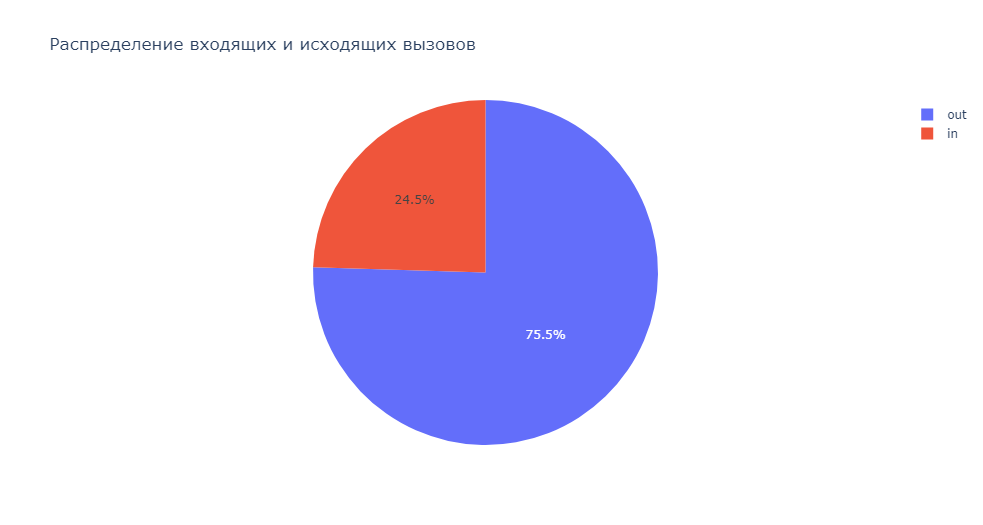

Клиенты совершают в три раза больше исходящих звонков, чем входящих (75,5% против 24,5%) - это на руку компании. 

Однако куда важнее для оценки расходов клиентов и выручки компании не количество вызовов, а их длительность, поэтому оценим также соотношение длительности вызовов по направлениям:

In [37]:
duration_by_direction = calls.groupby('direction', as_index = False)\
.agg({'total_call_duration': 'sum'})

duration_by_direction['rate'] = round(duration_by_direction['total_call_duration'] * 100 / 
                                      calls['total_call_duration'].sum(), 3)
duration_by_direction

direction  total_call_duration    rate
0        in             12342774  21.779
1       out             44330891  78.221

In [38]:
px.pie(duration_by_direction,
      names = 'direction',
      values = 'total_call_duration',
      title = 'Распределение длительности входящих и исходящих вызовов')

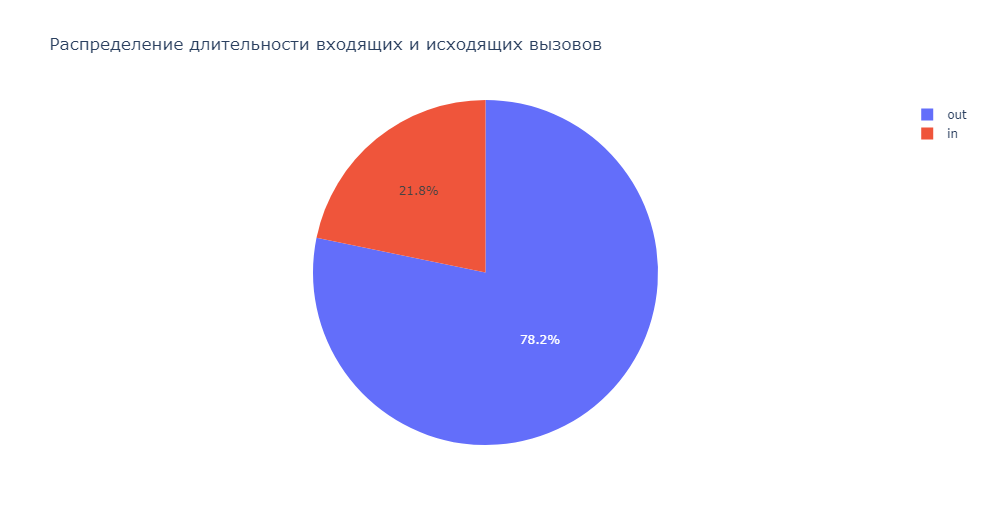

Длительность исходящих вызовов также выше, но уже почти в 4 раза (78,2% против 21,8%), чем длительность входящих. Это подразумевает более высокие расходы клиентов и более высокую выручку компании, чем если бы длительность входящих, наоборот, была выше.

### Анализ внутренних и внешних вызовов

Посмотрим, как распеделено количество внутренних и внешних вызовов в датасете:

In [39]:
calls_internal = calls.groupby('internal', as_index = False)\
.agg({'calls_count': 'sum'})\
.rename(columns = {'calls_count': 'amount'})

calls_internal['rate'] = round(calls_internal['amount'] * 100 / calls['calls_count'].sum(), 3)
calls_internal

internal  amount    rate
0     False  791829  98.155
1      True   14655   1.817

In [40]:
px.pie(calls_internal,
      names = 'internal',
      values = 'amount',
      title = 'Распределение количества внутренних и внешних вызовов')

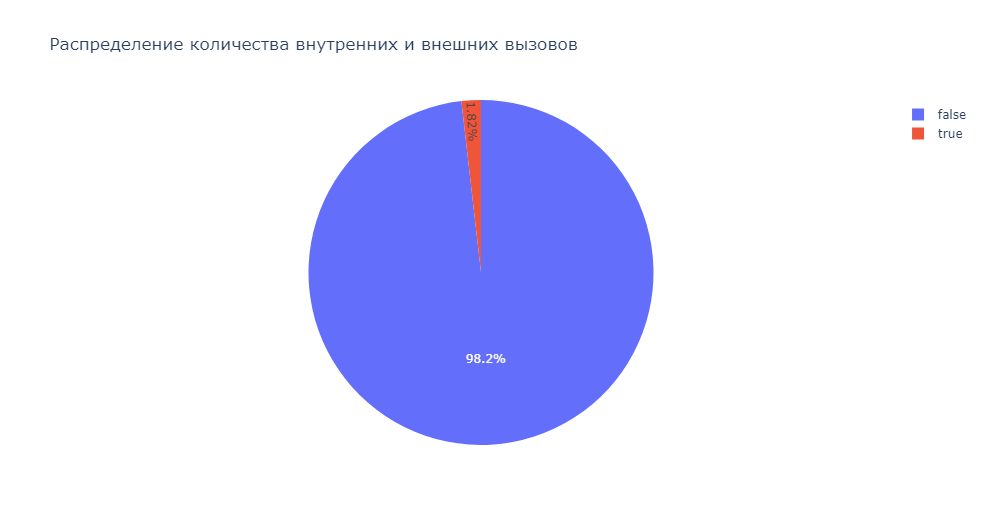

Почти все вызовы являются внешними - внутренних вызовов всего 1,82%. Рассмотрим распределение длительности:

In [41]:
duration_by_internal = calls.groupby('internal', as_index = False)\
.agg({'total_call_duration': 'sum'})

duration_by_internal['rate'] = round(duration_by_internal['total_call_duration'] * 100 /
                                    calls['total_call_duration'].sum(), 3)
duration_by_internal

internal  total_call_duration    rate
0     False             55950772  98.724
1      True               713905   1.260

In [42]:
px.pie(duration_by_internal,
      names = 'internal',
      values = 'total_call_duration',
      title = 'Распределение длительности внутренних и внешних вызовов')

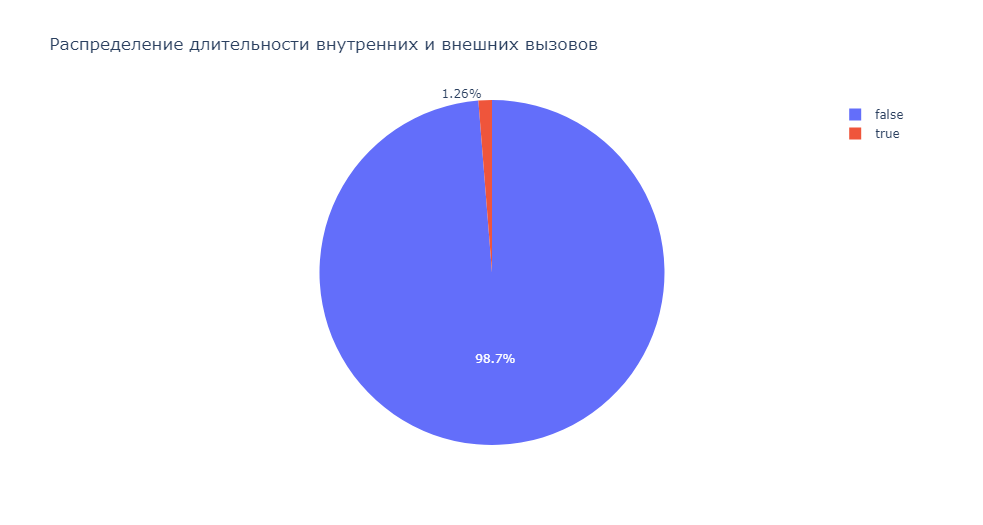

Распределение длительности показывает примерно ту же пропорцию: длительность внутренних вызовов - всего 1,26%. И это снова означает бóльшие расходы для клиентов и бóльшую выручку компании.

### Анализ операторов по количеству и длительности совершаемых вызовов

Определим, какое количество вызовов совершил каждый оператор за весь анализируемый период:

In [43]:
operators_calls = calls.groupby('operator_id', as_index = False)\
.agg({'calls_count': 'sum'})\
.rename(columns = {'calls_count': 'amount'})

operators_calls.head()

operator_id  amount
0     879896.0     930
1     879898.0    7313
2     880020.0      45
3     880022.0     197
4     880026.0    2232

И посмотрим на распределение количества вызовов по операторам:

In [44]:
px.histogram(operators_calls,
            x = 'amount',
            labels = {'amount': 'Количество вызовов'},
            text_auto = True,
            title = 'Распеделение количества вызовов по операторм')\
.update_xaxes(range = list([0, 3000]))\
.update_layout(yaxis = dict(title = 'Количество операторов'))

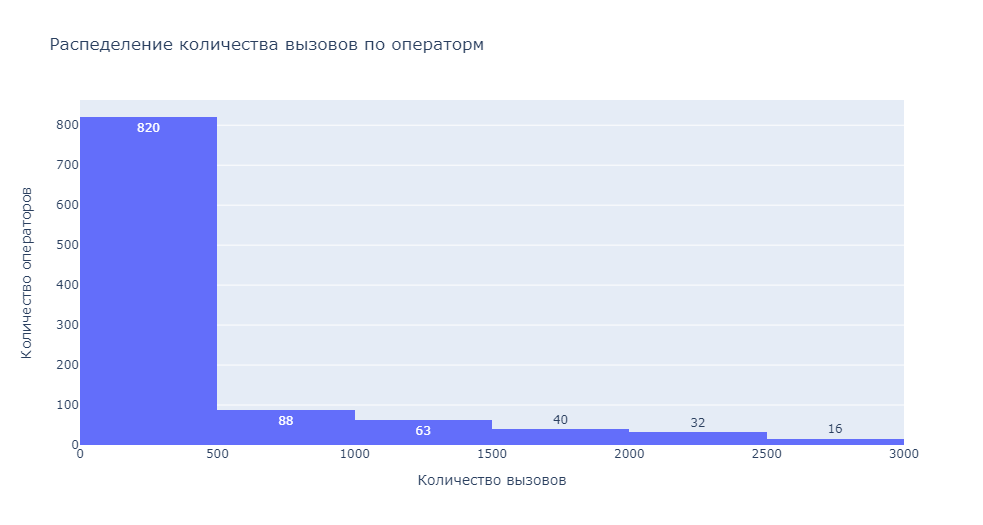

Абсолютное большинство операторов совершило и приняло за анализируемый период до 500 вызовов. Проверим, совпадает ли это распределение с длительностью вызовов:

In [45]:
operators_duration = calls.groupby('operator_id', as_index = False)\
.agg({'total_call_duration': 'sum'})

px.histogram(operators_duration,
            x = 'total_call_duration',
            labels = {'total_call_duration': 'Длительность вызовов'},
            text_auto = True,
            title = 'Распределение длительности вызовов по операторам')\
.update_xaxes(range = list([0, 500000]))\
.update_layout(yaxis = dict(title = 'Количество операторов'))

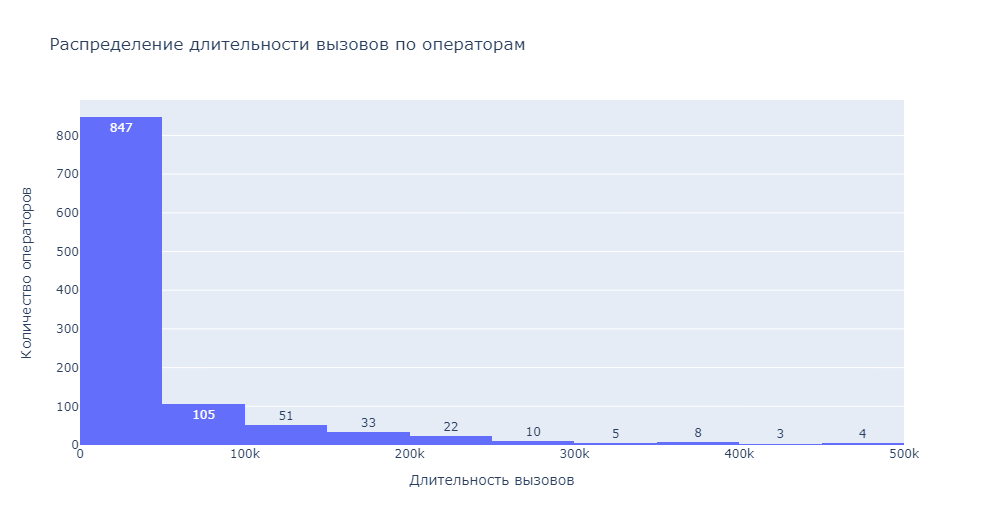

Большинство операторов "проговорили" до 500 000 секунд.

## Анализ количества операторов

Посмотрим, какое количество операторов было нанято у клиентов в каждом из анализируемых месяцев. Для этого добавим к таблице **calls** новый столбец с месяцем совершения звонков:

In [46]:
calls['call_month'] = calls['date'].astype('datetime64[M]')

clients_operators = calls.groupby(['user_id', 'call_month'], as_index = False)\
.agg(operators = ('operator_id', 'nunique'))\
.sort_values(by = 'operators', ascending = False)

clients_operators.head()

user_id call_month  operators
549   167626 2019-10-01         48
726   168187 2019-11-01         45
548   167626 2019-09-01         44
725   168187 2019-10-01         37
512   167497 2019-10-01         29

Из полученной таблицы видим, что у клиентов может быть до 48 операторов, хотя у некоторых клиентов они отсутствуют вообще. Оставим в таблице только тех клиентов, у которых есть операторы:

In [47]:
clients_operators = clients_operators[clients_operators['operators'] != 0]
clients_operators.head()

user_id call_month  operators
549   167626 2019-10-01         48
726   168187 2019-11-01         45
548   167626 2019-09-01         44
725   168187 2019-10-01         37
512   167497 2019-10-01         29

Разделим их на группы:

In [48]:
clients_operators['category'] = pd.cut(clients_operators['operators'], 5,
                                      labels = ['до 10 включительно',
                                               'от 11 до 19 включительно',
                                               'от 20 до 29 включительно',
                                               'от 30 до 38 включительно',
                                               'от 39 до 48 включительно'])
clients_operators.head()

user_id call_month  operators                  category
549   167626 2019-10-01         48  от 39 до 48 включительно
726   168187 2019-11-01         45  от 39 до 48 включительно
548   167626 2019-09-01         44  от 39 до 48 включительно
725   168187 2019-10-01         37  от 30 до 38 включительно
512   167497 2019-10-01         29  от 20 до 29 включительно

И визуализируем это распределение:

In [49]:
px.pie(clients_operators,
      names = 'category',
      values = 'operators',
      title = 'Распределение клиентов по количеству операторов')

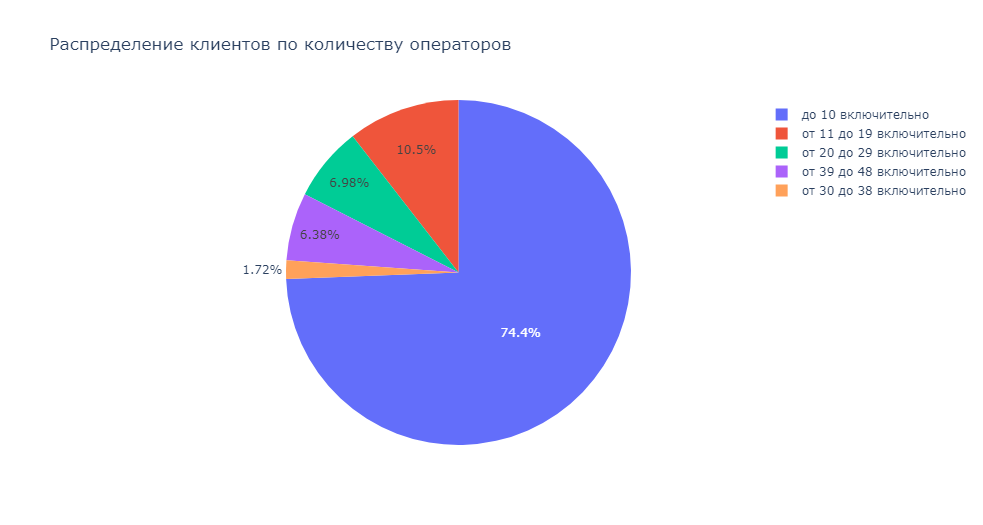

Большинство клиентов (74,4%) работают с количеством операторов до 10. 

### Анализ корреляции количества операторов и количества звонков

Посмотрим на коэффициент корреляции количества операторов и общего количества звонков:

In [50]:
for_corr = clients_operators.merge(calls.groupby(['user_id', 'call_month'], as_index = False).agg({'calls_count': 'sum'}),
                                  on = ['user_id', 'call_month'],
                                  how = 'left')
for_corr.head()

user_id call_month  operators                  category  calls_count
0   167626 2019-10-01         48  от 39 до 48 включительно        66482
1   168187 2019-11-01         45  от 39 до 48 включительно        14188
2   167626 2019-09-01         44  от 39 до 48 включительно        26924
3   168187 2019-10-01         37  от 30 до 38 включительно         7210
4   167497 2019-10-01         29  от 20 до 29 включительно         1398

In [51]:
for_corr['operators'].corr(for_corr['calls_count'])

0.5028649928036197

In [52]:
px.scatter(x = for_corr['operators'], 
           y = for_corr['calls_count'],
          labels = {'x': 'Количество операторов',
                   'y': 'Количество звонков'},
          title = 'Корреляция количества операторов и общего количества звонков')

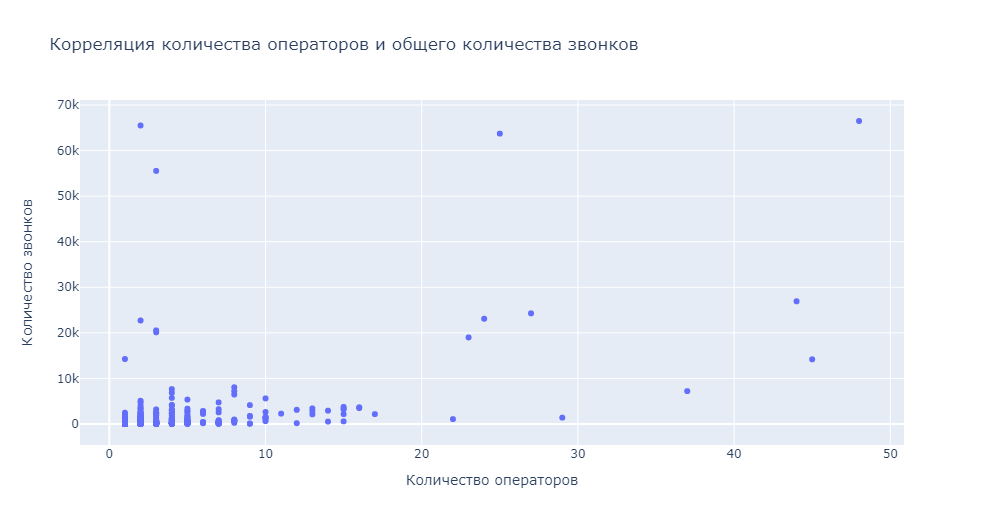

Коэффициент корреляции 0.5028649928036193 говорит о том, что линейная связь между данными показателями - слабая.

Проверим также корреляцию количества операторов и количества исходящих звонков:

In [53]:
for_corr_2 = clients_operators.merge(calls[calls['direction'] == 'out']
                                     .groupby(['user_id', 'call_month'], as_index = False).agg({'calls_count': 'sum'}),
                                     on = ['user_id', 'call_month'],
                                     how = 'left')
for_corr_2.head()

user_id call_month  operators                  category  calls_count
0   167626 2019-10-01         48  от 39 до 48 включительно      42977.0
1   168187 2019-11-01         45  от 39 до 48 включительно       8792.0
2   167626 2019-09-01         44  от 39 до 48 включительно      23314.0
3   168187 2019-10-01         37  от 30 до 38 включительно       4652.0
4   167497 2019-10-01         29  от 20 до 29 включительно       1119.0

In [54]:
for_corr_2['operators'].corr(for_corr_2['calls_count'])

0.4266347436305422

In [55]:
px.scatter(x = for_corr_2['operators'], 
           y = for_corr_2['calls_count'],
          labels = {'x': 'Количество операторов',
                   'y': 'Количество исходящих звонков'},
          title = 'Корреляция количества операторов и количества исходящих звонков')

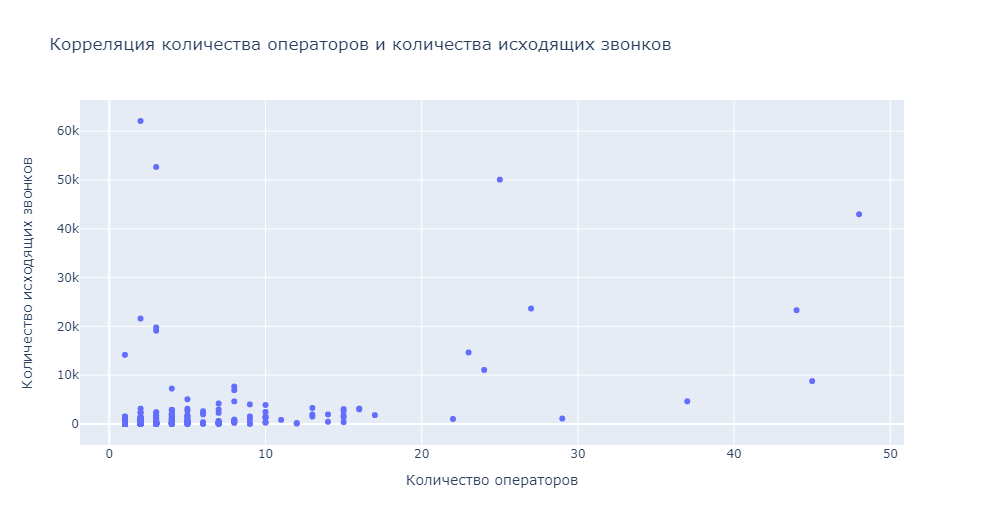

В данном случае коэффициент ещё меньше (0.4266347436305424) - количество исходящих звонков слабо зависит от количества операторов.

### Определение активных клиентов

В первую очередь сравним количество уникальных клиентов в обоих представленных датасетах:

In [56]:
display(clients['user_id'].nunique())
display(calls['user_id'].nunique())

732

307

В данных таблицы о звонках клиентов более, чем в два раза меньше. Сформируем новую таблицу, в которой оставим только тех клиентов из **clients**, которые также присутствуют в **calls**:

In [57]:
clients_new = clients[clients['user_id'].isin(calls['user_id'].unique())]
clients_new.head()

user_id tariff_plan date_start
0    166713           A 2019-08-15
1    166901           A 2019-08-23
4    168193           A 2019-10-16
7    168252           A 2019-10-17
16   168253           A 2019-10-18

Проверим по столбцу с датой регистрации, отсеклись ли ранее зарегистрированные пользователи:

In [58]:
display(clients_new['date_start'].min())
display(clients_new['date_start'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-10-31 00:00:00')

Временной интервал данных таблицы **clients_new** остался тем же, что и у таблицы **clients**.

А также добавим к таблице **calls** новый столбец с месяцем совершения звонков:

In [59]:
calls['call_month'] = calls['date'].astype('datetime64[M]')
calls.head()

user_id                date direction  internal  operator_id  \
0   166377 2019-08-03 21:00:00        in     False          NaN   
1   166377 2019-08-04 21:00:00       out      True     880022.0   
2   166377 2019-08-04 21:00:00       out      True     880020.0   
3   166377 2019-08-04 21:00:00       out      True     880020.0   
4   166377 2019-08-04 21:00:00       out     False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration call_month  
0            True            2              0                    4 2019-08-01  
1            True            3              0                    5 2019-08-01  
2            True            1              0                    1 2019-08-01  
3           False            1             10                   18 2019-08-01  
4            True            3              0                   25 2019-08-01

Сгруппируем таблицу по количеству исходящих звонков, совершённых клиентами, и оставим топ-100 клиентов:

In [60]:
top_calls = calls[calls['direction'] == 'out']\
.groupby('user_id', as_index = False)\
.agg({'calls_count': 'sum'})\
.sort_values(by = 'calls_count', ascending = False)\
.head(100)

top_calls.head()

user_id  calls_count
15    166582       137029
135   167626        66291
212   168361        64727
155   167827        38907
185   168062        24697

А также выполним аналогичную группировку по длительности вызовов:

In [61]:
top_duration = calls[calls['direction'] == 'out']\
.groupby('user_id', as_index = False)\
.agg({'total_call_duration': 'sum'})\
.sort_values(by = 'total_call_duration', ascending = False)\
.head(100)

top_duration.head()

user_id  total_call_duration
15    166582             11575056
212   168361              5610585
135   167626              4372619
20    166658              2152298
155   167827              1300203

Отберём из таблицы **calls** тех клиентов, которые попали в пересечение топ-100 по количеству и длительности вызовов:

In [62]:
top_users = calls[(calls['user_id'].isin(top_calls['user_id'])) &
               (calls['user_id'].isin(top_duration['user_id']))]

top_users.head()

user_id                date direction  internal  operator_id  \
0   166377 2019-08-03 21:00:00        in     False          NaN   
1   166377 2019-08-04 21:00:00       out      True     880022.0   
2   166377 2019-08-04 21:00:00       out      True     880020.0   
3   166377 2019-08-04 21:00:00       out      True     880020.0   
4   166377 2019-08-04 21:00:00       out     False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration call_month  
0            True            2              0                    4 2019-08-01  
1            True            3              0                    5 2019-08-01  
2            True            1              0                    1 2019-08-01  
3           False            1             10                   18 2019-08-01  
4            True            3              0                   25 2019-08-01

Сгруппируем таблицу по месяцам и посмотрим на количество совершённых звонков:

In [63]:
active = top_users.pivot_table(index = 'user_id',
                           columns = 'call_month',
                           values = 'calls_count',
                           aggfunc = 'sum')\
.sort_values(by = '2019-11-01', ascending = False)\
.reset_index()

active.columns = ['user_id', 'aug', 'sept', 'oct', 'nov']
active.head()

user_id  aug  sept      oct      nov
0   168361  NaN   NaN  18995.0  63713.0
1   168062  NaN   NaN   1074.0  24283.0
2   168252  NaN   NaN   3410.0  23094.0
3   167827  NaN   NaN  20128.0  20545.0
4   168187  NaN   NaN   7210.0  14188.0

Поскольку данные в таблице предоставлены по 27.11.2019 включительно, а данные о регистрации у нас есть по 31.10 включительно, клиентов, для которых не было звонков в ноябре, нельзя считать активными:

In [64]:
active = active[np.logical_not(active['nov'].isna())]
active.head()

user_id  aug  sept      oct      nov
0   168361  NaN   NaN  18995.0  63713.0
1   168062  NaN   NaN   1074.0  24283.0
2   168252  NaN   NaN   3410.0  23094.0
3   167827  NaN   NaN  20128.0  20545.0
4   168187  NaN   NaN   7210.0  14188.0

In [65]:
len(active)

87

**Итого мы получили 87 наиболее активных пользователей. Именно с ними мы будем работать далее для оптимизации их тарифных планов.**

Посмотрим, какое количество операторов задействовано у этих клиентов в каждом месяце:

In [66]:
clients_operators[clients_operators['user_id'].isin(active['user_id'])].head()

user_id call_month  operators                  category
726   168187 2019-11-01         45  от 39 до 48 включительно
725   168187 2019-10-01         37  от 30 до 38 включительно
512   167497 2019-10-01         29  от 20 до 29 включительно
697   168062 2019-11-01         27  от 20 до 29 включительно
763   168361 2019-11-01         25  от 20 до 29 включительно

In [67]:
px.pie(clients_operators[clients_operators['user_id'].isin(active['user_id'])],
      names = 'category',
      values = 'operators',
      title = 'Распределение активных клиентов по количеству операторов')

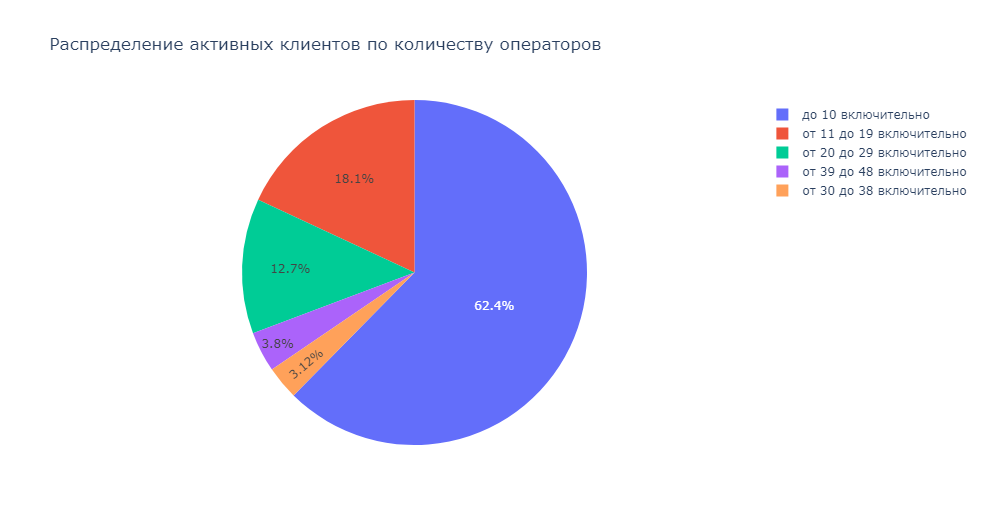

В категорию активных клиентов попали клиенты с разным количеством операторов, хотя доля группы "до 10 включительно" заметно сократилась - с 74,4% до 62,4%. 

### Расчёт текущих расходов активных клиентов

Отберём из таблицы **calls** только тех 87 клиентов, которых мы считаем активными. Для расчёта расходов оставим только данные об исходящих вызовах, поскольку входящие звонки в соответствии с условиями тарифов не тарифицируются. Также добавим к таблице информацию о тарифах и датах регистрации из таблицы **clients** и информацию о количестве операторов, а значения стобца **total_call_duration** переведём в минуты и округлим вверх:

In [68]:
calls_active = calls[(calls['user_id'].isin(active['user_id'])) &
                     (calls['direction'] == 'out')]
calls_active = calls_active.merge(clients, on = 'user_id', how = 'left')
calls_active = calls_active.merge(clients_operators, on = ['user_id', 'call_month'], how = 'left')

calls_active['total_call_duration'] = calls_active['total_call_duration'] / 60

for i in range(len(calls_active)):
    calls_active['total_call_duration'][i] = math.ceil(calls_active['total_call_duration'][i])
    
calls_active.head()

user_id                date direction  internal  operator_id  \
0   166377 2019-08-04 21:00:00       out      True     880022.0   
1   166377 2019-08-04 21:00:00       out      True     880020.0   
2   166377 2019-08-04 21:00:00       out      True     880020.0   
3   166377 2019-08-04 21:00:00       out     False     880022.0   
4   166377 2019-08-04 21:00:00       out     False     880020.0   

   is_missed_call  calls_count  call_duration  total_call_duration call_month  \
0            True            3              0                  1.0 2019-08-01   
1            True            1              0                  1.0 2019-08-01   
2           False            1             10                  1.0 2019-08-01   
3            True            3              0                  1.0 2019-08-01   
4           False            2              3                  1.0 2019-08-01   

  tariff_plan date_start  operators            category  
0           B 2019-08-01          5  до 10 включительно  
1           B 2019-08-01          5  до 10 включительно  
2           B 2019-08-01          5  до 10 включительно  
3           B 2019-08-01          5  до 10 включительно  
4           B 2019-08-01          5  до 10 включительно

И рассчитаем для каждого из клиентов общую длительность исходящих вызовов в каждом месяце с разбивкой по внутренним и внешним:

In [69]:
duration_active = calls_active.pivot_table(index = ['user_id', 'tariff_plan', 'operators', 'internal'], 
                                           columns = 'call_month',
                                           values = 'total_call_duration',
                                           aggfunc = 'sum')\
.reset_index()

duration_active.columns = ['user_id', 
                           'tariff_plan',
                           'operators',
                           'internal', 
                           'duration_aug', 
                           'duration_sept', 
                           'duration_oct', 
                           'duration_nov']

duration_active.head()

user_id tariff_plan  operators  internal  duration_aug  duration_sept  \
0   166377           B          4     False           NaN         1858.0   
1   166377           B          4      True           NaN            5.0   
2   166377           B          5     False        1337.0            NaN   
3   166377           B          5      True           8.0            NaN   
4   166405           B          2     False         931.0            NaN   

   duration_oct  duration_nov  
0           NaN        1521.0  
1           NaN           4.0  
2        1776.0           NaN  
3           2.0           NaN  
4           NaN           NaN

Далее зададим функцию для расчёта расходов клиента в текущем месяце **out_costs**.

Функция принимает на вход следующие параметры:
- **data** - таблица, к которой необходимо применить функцию;
- **duration_month** - столбец с длительностью минут исходящих вызовов необходимого месяца;
- **costs_month** - название столбца, в который будут записаны расходы за месяц.

Функция возвращает таблицу с новым столбцом.
Расчёт расходов производится следующим образом:

(Исх. вызовы внутри сети - 2000 минут) * тариф

+

(Исх. вызовы вне сети) * тариф

+

(Количество операторов) * тариф

+

(Аб. плата по тарифу)

Данные о стоимости тарифов заложим в соответствующие переменные:

In [70]:
out_limit = 2000

out_internal_A = 0.1
out_internal_B = 0.15
out_internal_C = 0.3

out_other_A = 0.4
out_other_B = 0.5
out_other_C = 0.7

per_operator = 100

per_month_A = 5000
per_month_B = 2000
per_month_C = 1000

In [71]:
def out_costs(data, duration_month, costs_month):
    data[costs_month] = [0] * len(data)
    for i in range(len(data)):
        if data['tariff_plan'][i] == 'A':
            if data['internal'][i] == True:
                if data[duration_month][i] <= out_limit:
                    data[costs_month][i] = 0
                else:
                    data[costs_month][i] = (data[duration_month][i] - out_limit) * out_internal_A
            else:
                data[costs_month][i] = data[duration_month][i] * out_other_A\
                + per_month_A + data['operators'][i] * per_operator
        elif data['tariff_plan'][i] == 'B':
            if data['internal'][i] == True:
                if data[duration_month][i] <= out_limit:
                    data[costs_month][i] = 0
                else:
                    data[costs_month][i] = (data[duration_month][i] - out_limit) * out_internal_B
            else:
                data[costs_month][i] = data[duration_month][i] * out_other_B\
                + per_month_B + data['operators'][i] * per_operator
        else:
            if data['internal'][i] == True:
                if data[duration_month][i] <= out_limit:
                    data[costs_month][i] = 0
                else:
                    data[costs_month][i] = (data[duration_month][i] - out_limit) * out_internal_C
            else:
                data[costs_month][i] = data[duration_month][i] * out_other_C\
                + per_month_C + data['operators'][i] * per_operator
    return data

Применим функцию к соответствующим столбцам таблицы:

In [72]:
out_costs(duration_active, 'duration_aug', 'costs_aug')
out_costs(duration_active, 'duration_sept', 'costs_sept')
out_costs(duration_active, 'duration_oct', 'costs_oct')
out_costs(duration_active, 'duration_nov', 'costs_nov')

duration_active.head()

user_id tariff_plan  operators  internal  duration_aug  duration_sept  \
0   166377           B          4     False           NaN         1858.0   
1   166377           B          4      True           NaN            5.0   
2   166377           B          5     False        1337.0            NaN   
3   166377           B          5      True           8.0            NaN   
4   166405           B          2     False         931.0            NaN   

   duration_oct  duration_nov  costs_aug  costs_sept  costs_oct  costs_nov  
0           NaN        1521.0        NaN      3329.0        NaN     3160.5  
1           NaN           4.0        NaN         0.0        NaN        0.0  
2        1776.0           NaN     3168.5         NaN     3388.0        NaN  
3           2.0           NaN        0.0         NaN        0.0        NaN  
4           NaN           NaN     2665.5         NaN        NaN        NaN

Просуммируем строки внешних и внутренних вызовов для каждого из пользователей, а также добавим столбец с общей суммой расходов:

In [73]:
costs_outcome = duration_active.groupby(['user_id',
                                         'tariff_plan',
                                         'operators'], as_index = False).agg('sum')
costs_outcome['total_costs'] = (costs_outcome['costs_aug'] + 
                                costs_outcome['costs_sept'] +
                                costs_outcome['costs_oct'] +
                                costs_outcome['costs_nov'])

costs_outcome.sort_values(by = 'total_costs', ascending = False).head()

user_id tariff_plan  operators  internal  duration_aug  duration_sept  \
25    166582           A          2         1       32195.0        86928.0   
151   168361           A         25         1           0.0            0.0   
26    166582           A          3         0           0.0            0.0   
27    166658           B         15         1        5363.0        11734.0   
39    166725           A          1         1          39.0          233.0   

     duration_oct  duration_nov  costs_aug  costs_sept  costs_oct  costs_nov  \
25            0.0           0.0    18077.6     39971.2        0.0        0.0   
151           0.0       70664.0        0.0         0.0        0.0    35763.2   
26        72468.0           0.0        0.0         0.0    34287.2        0.0   
27            0.0        8984.0     6181.5      9367.0        0.0     7992.0   
39          661.0         447.0     5115.6      5192.0     5364.4     5278.8   

     total_costs  
25       58048.8  
151      35763.2  
26       34287.2  
27       23540.5  
39       20950.8

Рассмотрим распределение общих сумм расходов по клиентам:

In [74]:
px.histogram(costs_outcome,
            x = 'total_costs',
            labels = {'total_costs': 'Общая сумма расходов, руб.'},
            title = 'Распределение активных клиентов по общей сумме расходов')\
.update_layout(yaxis = dict(title = 'Количество клиентов'))

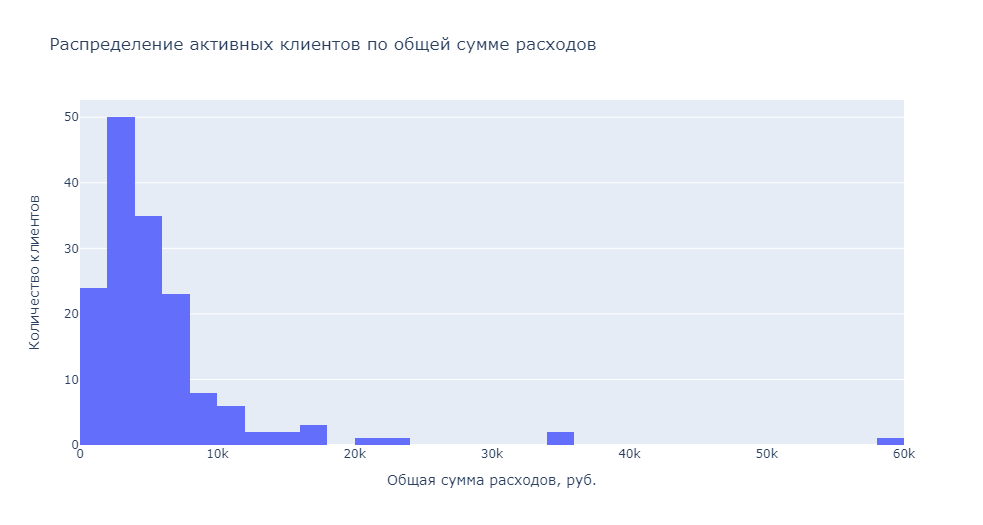

Расходы большей части клиентов за четыре месяца в сумме не превышают 10 000 руб., хотя есть и один клиент, который принёс компании в сумме почти 60 000 руб.

Также визуализируем общую сумму расходов клиентов по месяцам:

In [75]:
px.bar(pd.DataFrame([duration_active['costs_aug'].sum(), 
                     duration_active['costs_sept'].sum(),
                     duration_active['costs_oct'].sum(),
                     duration_active['costs_nov'].sum()],
                    ['Август 2019', 'Сентябрь 2019', 'Октябрь 2019', 'Ноябрь 2019']),
      text_auto = True,
      labels = {'index': 'Месяц',
               'value': 'Сумма расходов, руб.'},
      title = 'Сумма расходов активных клиентов по месяцам')\
.update_layout(showlegend=False)

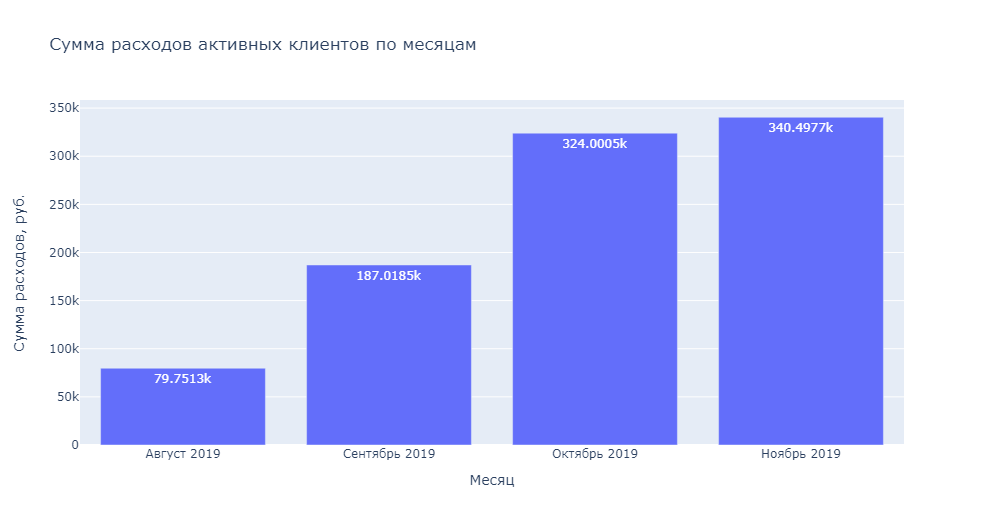

Общая сумма расходов активных клиентов ожидаемо растёт от месяца к месяцу (т.к. дата первой регистрации в полученных нами данных совпадает с датой начала фиксации вызовов) - в августе она составила почти 80 тыс. руб., а к ноябрю достигла почти 341 тыс. руб.

### Поиск более оптимальных тарифов для активных клиентов

Анализ разницы расходов рациональнее производить на основе последнего месяца, представленного в данных для анализа - ноября, т.к. данные в нём наиболее полные. Вне зависимости от того, в какую дату клиент зарегистрировался в системе, начиная с 01.01.2019 он уже мог совершать звонки. Поэтому сравнивать расходы текущего тарифа и потенциальные расходы на других тарифах будем, опираясь на данные за ноябрь.

Выделим из ранее сформированной таблицы **duration_active** столбцы, необходимые для дальнейшего анализа, в новую таблицу:

In [76]:
tariff_new = duration_active[['user_id', 'tariff_plan', 'operators', 'internal', 'duration_nov', 'costs_nov']]
tariff_new = tariff_new[np.logical_not(tariff_new['costs_nov'].isna())].reset_index(drop = True)
tariff_new.head()

user_id tariff_plan  operators  internal  duration_nov  costs_nov
0   166377           B          4     False        1521.0     3160.5
1   166377           B          4      True           4.0        0.0
2   166405           B          8     False        6771.0     6185.5
3   166405           B          8      True           4.0        0.0
4   166406           B          2     False         784.0     2592.0

И при помощи цикла добавим к таблице столбцы с суммами расходов на всех трёх тарифах при текущей длительности звонков:

In [77]:
tariff_new['tariff_A'] = [0] * len(tariff_new)
tariff_new['tariff_B'] = [0] * len(tariff_new)
tariff_new['tariff_C'] = [0] * len(tariff_new)

for i in range(len(tariff_new)):
    if tariff_new['tariff_plan'][i] == 'A':
        tariff_new['tariff_A'][i] = tariff_new['costs_nov'][i]
        if tariff_new['internal'][i] == True:
            if tariff_new['duration_nov'][i] <= out_limit:
                tariff_new['tariff_B'][i] = 0
                tariff_new['tariff_C'][i] = 0
            else:
                tariff_new['tariff_B'][i] = (tariff_new['duration_nov'][i] - out_limit) * out_internal_B
                tariff_new['tariff_C'][i] = (tariff_new['duration_nov'][i] - out_limit) * out_internal_C
        else:
            tariff_new['tariff_B'][i] = tariff_new['duration_nov'][i] * out_other_B\
                                         + per_month_B + tariff_new['operators'][i] * per_operator
            tariff_new['tariff_C'][i] = tariff_new['duration_nov'][i] * out_other_C\
                                         + per_month_C + tariff_new['operators'][i] * per_operator
    elif tariff_new['tariff_plan'][i] == 'B':
        tariff_new['tariff_B'][i] = tariff_new['costs_nov'][i]
        if tariff_new['internal'][i] == True:
            if tariff_new['duration_nov'][i] <= out_limit:
                tariff_new['tariff_A'][i] = 0
                tariff_new['tariff_C'][i] = 0
            else:
                tariff_new['tariff_A'][i] = (tariff_new['duration_nov'][i] - out_limit) * out_internal_A
                tariff_new['tariff_C'][i] = (tariff_new['duration_nov'][i] - out_limit) * out_internal_C
        else:
            tariff_new['tariff_A'][i] = tariff_new['duration_nov'][i] * out_other_A\
                                         + per_month_A + tariff_new['operators'][i] * per_operator
            tariff_new['tariff_C'][i] = tariff_new['duration_nov'][i] * out_other_C\
                                         + per_month_C + tariff_new['operators'][i] * per_operator
    else:
        tariff_new['tariff_C'][i] = tariff_new['costs_nov'][i]
        if tariff_new['internal'][i] == True:
            if tariff_new['duration_nov'][i] <= out_limit:
                tariff_new['tariff_A'][i] = 0
                tariff_new['tariff_B'][i] = 0
            else:
                tariff_new['tariff_A'][i] = (tariff_new['duration_nov'][i] - out_limit) * out_internal_A
                tariff_new['tariff_B'][i] = (tariff_new['duration_nov'][i] - out_limit) * out_internal_B
        else:
            tariff_new['tariff_A'][i] = tariff_new['duration_nov'][i] * out_other_A\
                                         + per_month_A + tariff_new['operators'][i] * per_operator
            tariff_new['tariff_B'][i] = tariff_new['duration_nov'][i] * out_other_B\
                                         + per_month_B + tariff_new['operators'][i] * per_operator

tariff_new = tariff_new.groupby(['user_id', 'tariff_plan', 'operators'], as_index = False)\
.agg('sum')

In [78]:
tariff_new[['tariff_A', 'tariff_B', 'tariff_C']] = round(tariff_new[['tariff_A', 'tariff_B', 'tariff_C']])
tariff_new.head()

user_id tariff_plan  operators  internal  duration_nov  costs_nov  \
0   166377           B          4         1        1525.0     3160.5   
1   166405           B          8         1        6775.0     6185.5   
2   166406           B          2         0         784.0     2592.0   
3   166407           A          7         1         301.0     5754.8   
4   166485           B          5         1        3524.0     4156.0   

   tariff_A  tariff_B  tariff_C  
0    6008.0    3160.0    2465.0  
1    8508.0    6186.0    6540.0  
2    5514.0    2592.0    1749.0  
3    5755.0    2768.0    1796.0  
4    6825.0    4156.0    3818.0

Добавим к таблице столбец **is_optimal**, который будет отражать, оптимален ли тариф, который использует клиент на данный момент (**True** - тариф оптимален, **False** - есть более выгодные тарифы):

In [79]:
tariff_new['is_optimal'] = 0

for i in range(len(tariff_new)):
    if math.floor(tariff_new['costs_nov'][i]) <= min([tariff_new['tariff_A'][i], tariff_new['tariff_B'][i], tariff_new['tariff_C'][i]]):
        tariff_new['is_optimal'][i] = True
    else:
        tariff_new['is_optimal'][i] = False
        
tariff_new.head()

user_id tariff_plan  operators  internal  duration_nov  costs_nov  \
0   166377           B          4         1        1525.0     3160.5   
1   166405           B          8         1        6775.0     6185.5   
2   166406           B          2         0         784.0     2592.0   
3   166407           A          7         1         301.0     5754.8   
4   166485           B          5         1        3524.0     4156.0   

   tariff_A  tariff_B  tariff_C is_optimal  
0    6008.0    3160.0    2465.0      False  
1    8508.0    6186.0    6540.0       True  
2    5514.0    2592.0    1749.0      False  
3    5755.0    2768.0    1796.0      False  
4    6825.0    4156.0    3818.0      False

Посмотрим, клиенты с каким тарифом преобладают среди активных:

In [80]:
px.pie(tariff_new.groupby('tariff_plan', as_index = False).agg({'user_id': 'nunique'}),
      names = 'tariff_plan',
      values = 'user_id',
      title = 'Распределение долей активных клиентов по тарифам')

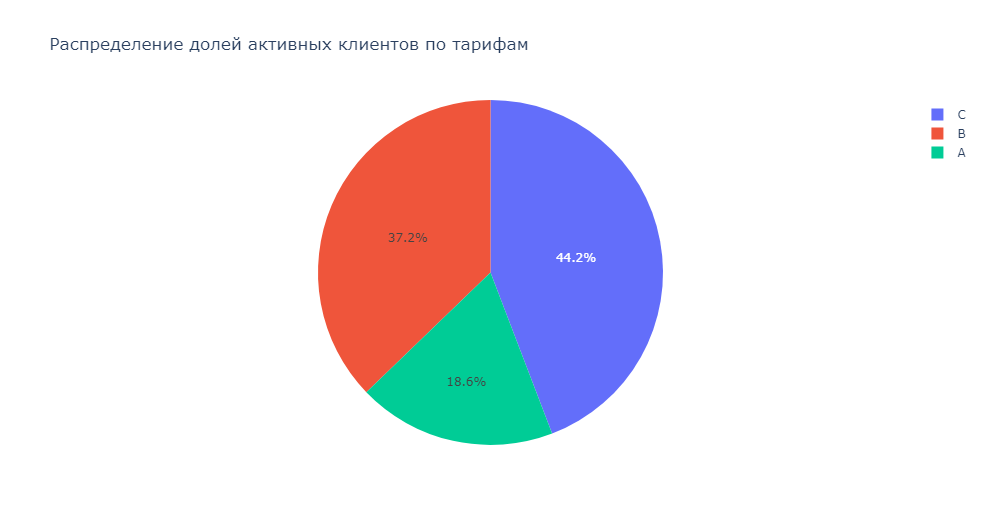

В основном активные клиенты используют тариф C - это около 44,2% от общего числа клиентов. Наименьшей же популярностью пользуется тариф А - его используют 18,6% клиентов.

Рассмотрим, какой процент клиентов используют оптимальный для своих потребностей тариф:

In [81]:
px.pie(tariff_new.groupby('is_optimal', as_index = False).agg({'user_id': 'nunique'}),
      names = 'is_optimal',
      values = 'user_id',
      title = 'Распределение долей клиентов по оптимальности тарифа')

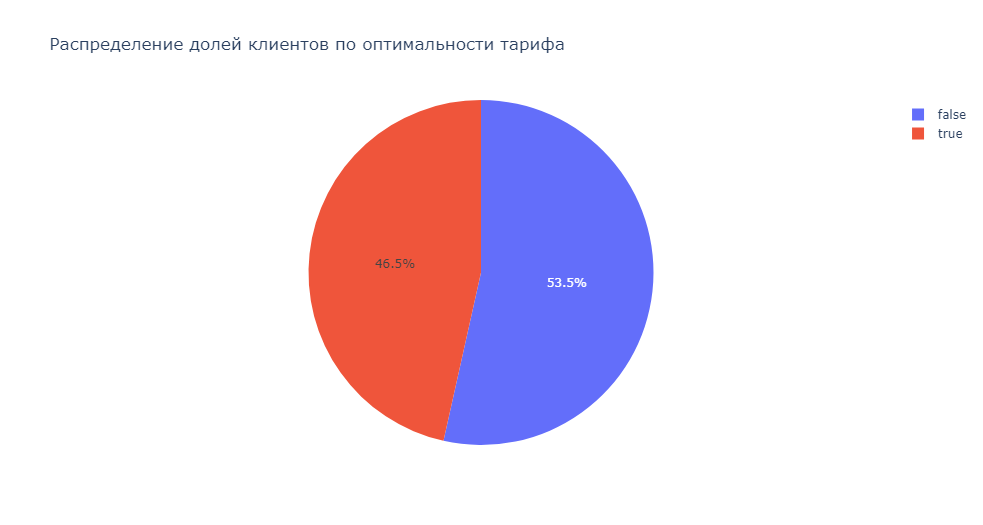

Больше половины клиентов (53,5%) используют не самый оптимальный для себя тариф.

Также рассмотрим соотношение клиентов, которые используют оптимальные и неоптимальные тарифы, в разрезе самих тарифных планов:

In [82]:
px.histogram(tariff_new,
            x = 'tariff_plan',
            color = 'is_optimal',
            barmode = 'group',
            text_auto = True,
            labels = {'tariff_plan': 'Тариф',
                     'is_optimal': 'Оптимальность тарифа'},
            title = 'Распределение клиентов, использующих оптимальные и неоптимальные тарифы')\
.update_layout(yaxis = dict(title = 'Количество клиентов'))

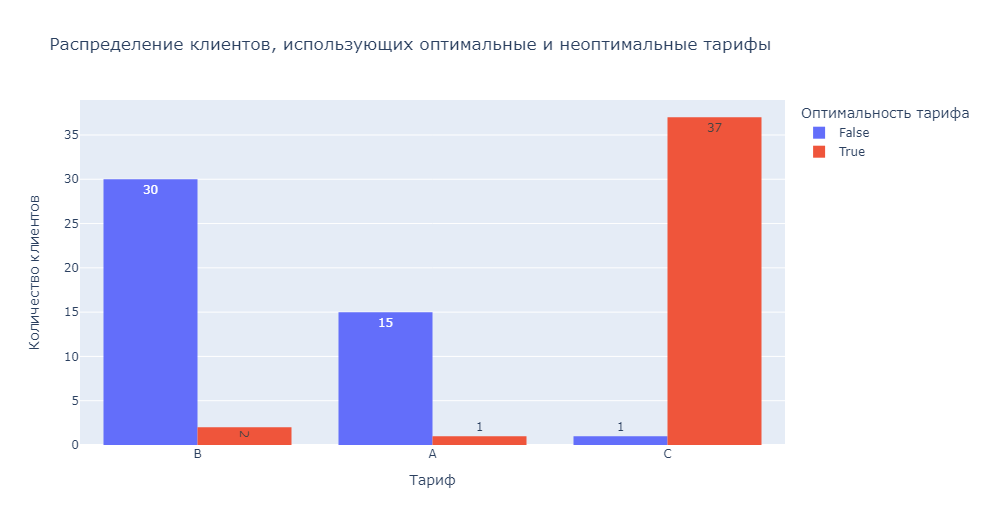

Всего для двоих клиентов тариф В оптимален, и всего для 1 - тариф А оптимален. Тариф С не оптимален для одного клиента.

Далее оставим в таблице только тех клиентов, чьи текущие тарифы - не самые выгодные:

In [83]:
tariff_new = tariff_new[tariff_new['is_optimal'] == False].reset_index(drop = True)
len(tariff_new)

46

Из 87 активных клиентов 46 пользуются невыгодными тарифами.

Посмотрим на то, какие доли занимают тарифы среди оставшихся 82 клиентов:

In [84]:
px.pie(tariff_new.groupby('tariff_plan', as_index = False).agg({'user_id': 'nunique'}),
      names = 'tariff_plan',
      values = 'user_id',
      title = 'Доли тарифов среди клиентов на невыгодных тарифных планах')

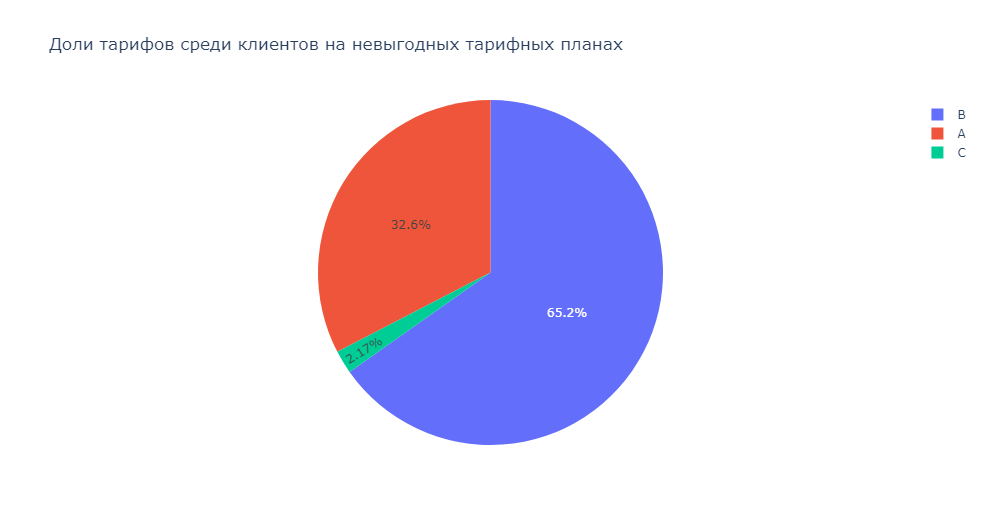

Наиболее часто невыгодным тарифом для активных клиентов является тариф В - в 65,2% случаев. Тариф С является наименее выгодным всего в 2,17% случаев.

Добавим к таблице столбцы с названием и расходами по **наиболее оптимальным** тарифам для каждого клиента:

In [85]:
tariff_new['most_optimal'] = 0
tariff_new['most_optimal_costs'] = 0

for i in range(len(tariff_new)):
    if tariff_new['tariff_A'][i] <= min([tariff_new['tariff_A'][i], tariff_new['tariff_B'][i], tariff_new['tariff_C'][i]]):
        tariff_new['most_optimal'][i] = 'A'
        tariff_new['most_optimal_costs'][i] = min([tariff_new['tariff_A'][i], 
                                                   tariff_new['tariff_B'][i], 
                                                   tariff_new['tariff_C'][i]])
    elif tariff_new['tariff_B'][i] <= min([tariff_new['tariff_A'][i], tariff_new['tariff_B'][i], tariff_new['tariff_C'][i]]):
        tariff_new['most_optimal'][i] = 'B'
        tariff_new['most_optimal_costs'][i] = min([tariff_new['tariff_A'][i], 
                                                   tariff_new['tariff_B'][i], 
                                                   tariff_new['tariff_C'][i]])
    else:
        tariff_new['most_optimal'][i] = 'C'
        tariff_new['most_optimal_costs'][i] = min([tariff_new['tariff_A'][i], 
                                                   tariff_new['tariff_B'][i], 
                                                   tariff_new['tariff_C'][i]])
        
tariff_new.head()

user_id tariff_plan  operators  internal  duration_nov  costs_nov  \
0   166377           B          4         1        1525.0     3160.5   
1   166406           B          2         0         784.0     2592.0   
2   166407           A          7         1         301.0     5754.8   
3   166485           B          5         1        3524.0     4156.0   
4   166495           B          1         1         485.0     2342.5   

   tariff_A  tariff_B  tariff_C is_optimal most_optimal  most_optimal_costs  
0    6008.0    3160.0    2465.0      False            C                2465  
1    5514.0    2592.0    1749.0      False            C                1749  
2    5755.0    2768.0    1796.0      False            C                1796  
3    6825.0    4156.0    3818.0      False            C                3818  
4    5294.0    2342.0    1440.0      False            C                1440

Посмотрим на распределение тарифов при условии перевода всех активных клиентов на самый выгодный для них:

In [86]:
px.pie(tariff_new.groupby('most_optimal', as_index = False).agg({'user_id': 'nunique'}),
      names = 'most_optimal',
      values = 'user_id',
      title = 'Распределение самых оптимальных тарифов')

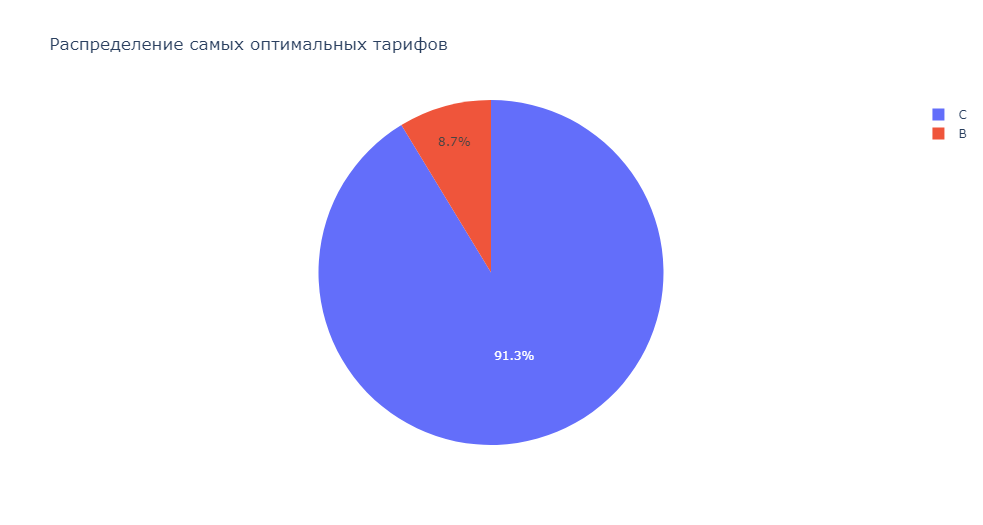

В случае перевода активных пользователей на самый оптимальный тариф 91,3% пользователей будут использовать тариф С, тариф А фигурировать не будет. Это может негативно сказаться на выручке компании.

### Минимизация потерь компании

Для того, чтобы повысить лояльность клиентов, достаточно предложить им не самые выгодные тарифы, а просто более оптимальные. Проверим, есть ли такие клиенты, для которых можно предложить снижение расходов, не предлагая самый убыточный для компании тариф. Если такие клиенты есть - информацию о тарифе и его стоимости запишем в столбцы **recommend** и **recommend_costs**. В таблице **tariff_new** оставим только необходимые столбцы:

In [87]:
tariff_new = tariff_new[['user_id',
                        'tariff_plan',
                        'costs_nov',
                        'tariff_A',
                        'tariff_B',
                        'tariff_C',
                        'is_optimal',
                        'most_optimal',
                        'most_optimal_costs']]

In [88]:
tariff_new['recommend'] = 0
tariff_new['recommend_costs'] = 0

for i in range(len(tariff_new)):
    costs_list = [tariff_new['tariff_A'][i], tariff_new['tariff_B'][i], tariff_new['tariff_C'][i]]
    costs_list.sort(reverse = True)
    if costs_list[0] < math.floor(tariff_new['costs_nov'][i]) and costs_list[0] > tariff_new['most_optimal_costs'][i]:
        tariff_new['recommend_costs'][i] = costs_list[0]
    elif costs_list[1] < math.floor(tariff_new['costs_nov'][i]) and costs_list[1] > tariff_new['most_optimal_costs'][i]:
        tariff_new['recommend_costs'][i] = costs_list[1]
    else:
        tariff_new['recommend_costs'][i] = costs_list[2]
    
    if tariff_new['recommend_costs'][i] == tariff_new['tariff_A'][i]:
        tariff_new['recommend'][i] = 'A'
    elif tariff_new['recommend_costs'][i] == tariff_new['tariff_B'][i]:
        tariff_new['recommend'][i] = 'B'
    elif tariff_new['recommend_costs'][i] == tariff_new['tariff_C'][i]:
        tariff_new['recommend'][i] = 'C'
        
tariff_new.head()

user_id tariff_plan  costs_nov  tariff_A  tariff_B  tariff_C is_optimal  \
0   166377           B     3160.5    6008.0    3160.0    2465.0      False   
1   166406           B     2592.0    5514.0    2592.0    1749.0      False   
2   166407           A     5754.8    5755.0    2768.0    1796.0      False   
3   166485           B     4156.0    6825.0    4156.0    3818.0      False   
4   166495           B     2342.5    5294.0    2342.0    1440.0      False   

  most_optimal  most_optimal_costs recommend  recommend_costs  
0            C                2465         C             2465  
1            C                1749         C             1749  
2            C                1796         B             2768  
3            C                3818         C             3818  
4            C                1440         C             1440

Посмотрим, для какого количества клиентов более выгодный тариф не обязательно - самый дешёвый:

In [89]:
len(tariff_new[tariff_new['most_optimal'] != tariff_new['recommend']])

14

И визуализируем распределение тарифов при переводе клиентов на рекомендуемые тарифы:

In [90]:
px.pie(tariff_new.groupby('recommend', as_index = False).agg({'user_id': 'nunique'}),
      names = 'recommend',
      values = 'user_id',
      title = 'Распределение рекомендуемых тарифов')

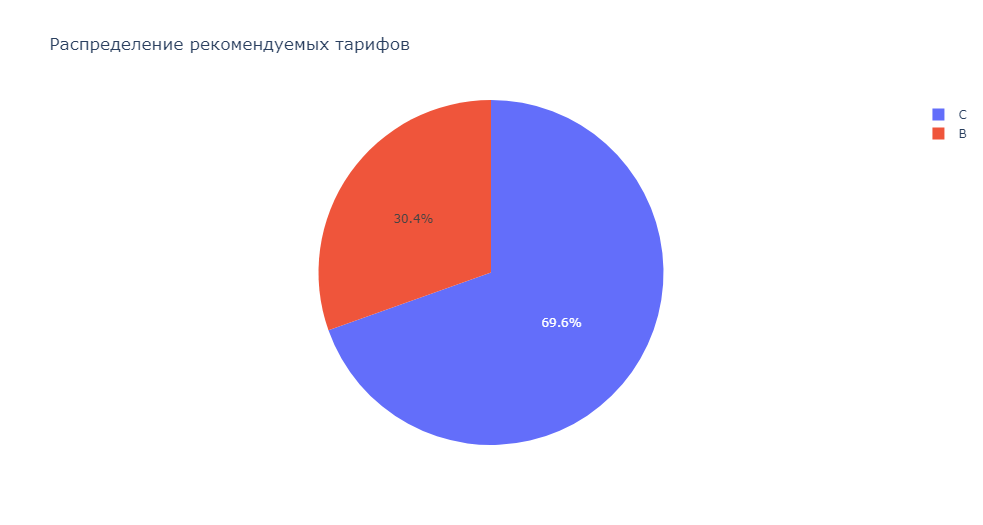

Доля тарифов В выросла с 8,7 до 30,4%.

Рассчитаем выгоду клиентов при переходе на предлагаемые тарифы:

In [91]:
tariff_diff = tariff_new[['user_id',
                         'tariff_plan',
                         'costs_nov',
                         'recommend',
                         'recommend_costs']]

tariff_diff['economy'] = tariff_diff['costs_nov'] - tariff_diff['recommend_costs']
tariff_diff['economy_%'] = 100 - round(tariff_diff['recommend_costs'] * 100 / tariff_diff['costs_nov'], 2)

In [92]:
tariff_diff

user_id tariff_plan  costs_nov recommend  recommend_costs  economy  \
0    166377           B     3160.5         C             2465    695.5   
1    166406           B     2592.0         C             1749    843.0   
2    166407           A     5754.8         B             2768   2986.8   
3    166485           B     4156.0         C             3818    338.0   
4    166495           B     2342.5         C             1440    902.5   
5    166503           B     2371.0         C             1399    972.0   
6    166536           B     2688.5         C             1844    844.5   
7    166582           A     5705.2         B             2856   2849.2   
8    166678           B     2522.5         C             1612    910.5   
9    166680           B     5093.0         C             4810    283.0   
10   166725           A     5278.8         B             2324   2954.8   
11   166839           B     2107.5         C             1110    997.5   
12   166899           B     2576.0         C             1726    850.0   
13   166901           A     5655.6         B             2670   2985.6   
14   166916           A     6976.8         B             4121   2855.8   
15   167004           B     2276.5         C             1347    929.5   
16   167060           B     2616.0         C             1702    914.0   
17   167071           B     2400.0         C             1480    920.0   
18   167172           B     2461.5         C             1526    935.5   
19   167175           B     2691.5         C             1888    803.5   
20   167176           B     2860.5         C             1885    975.5   
21   167185           A     5326.0         B             2358   2968.0   
22   167359           B     3014.5         C             2100    914.5   
23   167445           B     3890.5         C             3207    683.5   
24   167479           B     3258.5         C             2682    576.5   
25   167487           B     2534.0         C             1628    906.0   
26   167497           A     7474.0         B             4668   2806.0   
27   167580           B     3704.0         C             2826    878.0   
28   167634           A     5392.4         B             2466   2926.4   
29   167654           B     3085.5         C             2440    645.5   
30   167716           B     2331.0         C             1423    908.0   
31   167799           A     5342.8         B             2404   2938.8   
32   167827           C     7385.1         B             6646    739.1   
33   167828           A     6532.4         B             3690   2842.4   
34   167947           B     2689.5         C             1805    884.5   
35   167949           A     5764.4         B             2856   2908.4   
36   167955           B     2608.5         C             1772    836.5   
37   167977           B     3069.5         C             2297    772.5   
38   168018           B     4244.5         C             3982    262.5   
39   168021           B     3383.0         C             2776    607.0   
40   168062           A    14162.8         B            12778   1384.8   
41   168091           B     5622.5         C             5432    190.5   
42   168154           B     3643.0         C             3220    423.0   
43   168187           A    13442.4         C            12399   1043.4   
44   168252           A    12677.6         C            12636     41.6   
45   168253           A     5812.0         B             2965   2847.0   

    economy_%  
0       22.01  
1       32.52  
2       51.90  
3        8.13  
4       38.53  
5       41.00  
6       31.41  
7       49.94  
8       36.10  
9        5.56  
10      55.97  
11      47.33  
12      33.00  
13      52.79  
14      40.93  
15      40.83  
16      34.94  
17      38.33  
18      38.01  
19      29.85  
20      34.10  
21      55.73  
22      30.34  
23      17.57  
24      17.69  
25      35.75  
26      37.54  
27      23.70  
28      54.27  
29      20.92  
30      38.95  
31      55.00

Выгрузку такого вида можно направить заказчику для передачи в работу менеджерам.

Проверим, есть ли в данных клиенты, которые превышают лимит на 2000 исходящих звонков внутри сети. Найдём суммарную длительность исходящих внутренних вызовов для каждого клиента с разбивкой по месяцам, а далее переведём её из секунд в минуты:

In [93]:
over_limit = calls[(calls['internal'] == True) & (calls['direction'] == 'out')]\
.groupby(['user_id', 'call_month'], as_index = False)\
.agg({'total_call_duration': 'sum'})\
.sort_values(by = 'total_call_duration', ascending = False)

over_limit['total_call_duration'] = over_limit['total_call_duration'] / 60

In [94]:
over_limit.head()

user_id call_month  total_call_duration
89    166916 2019-11-01          1323.300000
190   167497 2019-11-01          1313.450000
246   168091 2019-11-01           658.916667
241   168062 2019-11-01           503.616667
167   167359 2019-10-01           418.083333

Даже клиенты с самой большой длительностью исходящих внутренних вызовов не доходят до лимита в 2000 минут. Всего два клиента за весь анализируемый период перешагнули порог в 1000 минут, ещё два - порог в 500 минут.

**Рекомендация**: снизить лимит бесплатных внутренних исходящих вызовов.

### Расчёт текущей выручки компании

Ранее мы определили функцию **out_costs** для расчёта расходов активных клиентов. Её же можно использовать для расчёта выручки компании. Обработаем таблицу **calls** аналогичным образом, но теперь уже для всех клиентов: оставим только данные об исходящих вызовах,  добавим к таблице информацию о тарифах, датах регистрации и операторах и рассчитаем для каждого из клиентов общую длительность исходящих вызовов в каждом месяце с разбивкой по внутренним и внешним. Данные в столбце **total_call_duration** переведём в минуты и округлим вверх:

In [95]:
for_revenue = calls[calls['direction'] == 'out']
for_revenue = for_revenue.merge(clients, on = 'user_id', how = 'left')
for_revenue = for_revenue.merge(clients_operators, on = ['user_id', 'call_month'], how = 'left')
for_revenue['total_call_duration'] = for_revenue['total_call_duration'] / 60

for i in range(len(for_revenue['total_call_duration'])):
    for_revenue['total_call_duration'][i] = math.ceil(for_revenue['total_call_duration'][i])

total_duration = for_revenue.pivot_table(index = ['user_id', 'tariff_plan', 'operators', 'internal'],
                                        columns = 'call_month',
                                        values = 'total_call_duration',
                                        aggfunc = 'sum')\
.reset_index()

total_duration.columns = ['user_id',
                         'tariff_plan',
                         'operators',
                         'internal',
                         'duration_aug',
                         'duration_sept',
                         'duration_oct',
                         'duration_nov']

total_duration.head()

user_id tariff_plan  operators  internal  duration_aug  duration_sept  \
0   166377           B          4     False           NaN         1858.0   
1   166377           B          4      True           NaN            5.0   
2   166377           B          5     False        1337.0            NaN   
3   166377           B          5      True           8.0            NaN   
4   166391           C          2      True           1.0            NaN   

   duration_oct  duration_nov  
0           NaN        1521.0  
1           NaN           4.0  
2        1776.0           NaN  
3           2.0           NaN  
4           NaN           NaN

Применим к столбцам таблицы функцию **out_costs**:

In [96]:
out_costs(total_duration, 'duration_aug', 'revenue_aug')
out_costs(total_duration, 'duration_sept', 'revenue_sept')
out_costs(total_duration, 'duration_oct', 'revenue_oct')
out_costs(total_duration, 'duration_nov', 'revenue_nov')

total_duration[['revenue_aug', 'revenue_sept', 'revenue_oct', 'revenue_nov']]\
= round(total_duration[['revenue_aug', 'revenue_sept', 'revenue_oct', 'revenue_nov']])

total_duration.head()

user_id tariff_plan  operators  internal  duration_aug  duration_sept  \
0   166377           B          4     False           NaN         1858.0   
1   166377           B          4      True           NaN            5.0   
2   166377           B          5     False        1337.0            NaN   
3   166377           B          5      True           8.0            NaN   
4   166391           C          2      True           1.0            NaN   

   duration_oct  duration_nov  revenue_aug  revenue_sept  revenue_oct  \
0           NaN        1521.0          NaN        3329.0          NaN   
1           NaN           4.0          NaN           0.0          NaN   
2        1776.0           NaN       3168.0           NaN       3388.0   
3           2.0           NaN          0.0           NaN          0.0   
4           NaN           NaN          0.0           NaN          NaN   

   revenue_nov  
0       3160.0  
1          0.0  
2          NaN  
3          NaN  
4          NaN

Просуммируем строки внешних и внутренних вызовов для каждого из пользователей, а также добавим столбец с общей суммой расходов:

In [97]:
revenue = total_duration.groupby(['user_id',
                                  'tariff_plan',
                                  'operators'], as_index = False).agg('sum')
revenue['total_revenue'] = (revenue['revenue_aug'] + 
                          revenue['revenue_sept'] +
                          revenue['revenue_oct'] +
                          revenue['revenue_nov'])

revenue.sort_values(by = 'total_revenue', ascending = False).head()

user_id tariff_plan  operators  internal  duration_aug  duration_sept  \
31    166582           A          2         1       32195.0        86928.0   
341   168361           A         25         1           0.0            0.0   
32    166582           A          3         0           0.0            0.0   
235   167626           A         48         1           0.0            0.0   
39    166658           B         15         1        5363.0        11734.0   

     duration_oct  duration_nov  revenue_aug  revenue_sept  revenue_oct  \
31            0.0           0.0      18078.0       39971.0          0.0   
341           0.0       70664.0          0.0           0.0          0.0   
32        72468.0           0.0          0.0           0.0      34287.0   
235       47580.0           0.0          0.0           0.0      28832.0   
39            0.0        8984.0       6182.0        9367.0          0.0   

     revenue_nov  total_revenue  
31           0.0        58049.0  
341      35763.0        35763.0  
32           0.0        34287.0  
235          0.0        28832.0  
39        7992.0        23541.0

Рассмотрим распределение общей выручки по клиентам:

In [98]:
px.histogram(revenue,
            x = 'total_revenue',
            labels = {'total_revenue': 'Общая выручка, руб.'},
            title = 'Распределение клиентов по выручке')\
.update_layout(yaxis = dict(title = 'Количество клиентов'))

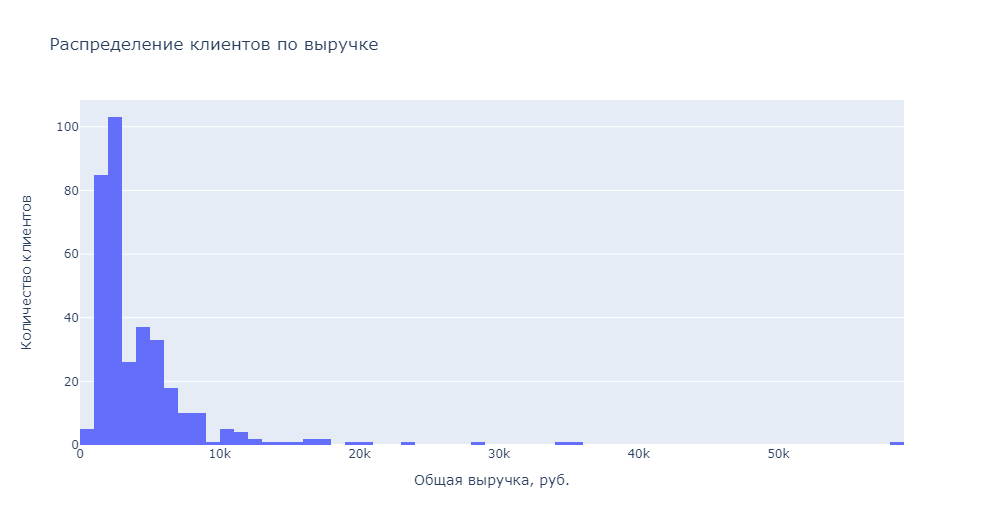

Выручка от предоставления услуг большей части клиентов не превышает 5000 руб. за четыре анализируемых месяца.

Визуализируем общую сумму выручки по месяцам:

In [99]:
px.bar(pd.DataFrame([revenue['revenue_aug'].sum(), 
                     revenue['revenue_sept'].sum(),
                     revenue['revenue_oct'].sum(),
                     revenue['revenue_nov'].sum()],
                    ['Август 2019', 'Сентябрь 2019', 'Октябрь 2019', 'Ноябрь 2019']),
      text_auto = True,
      labels = {'index': 'Месяц',
               'value': 'Сумма выручки, руб.'},
      title = 'Сумма выручки по месяцам')\
.update_layout(showlegend=False)

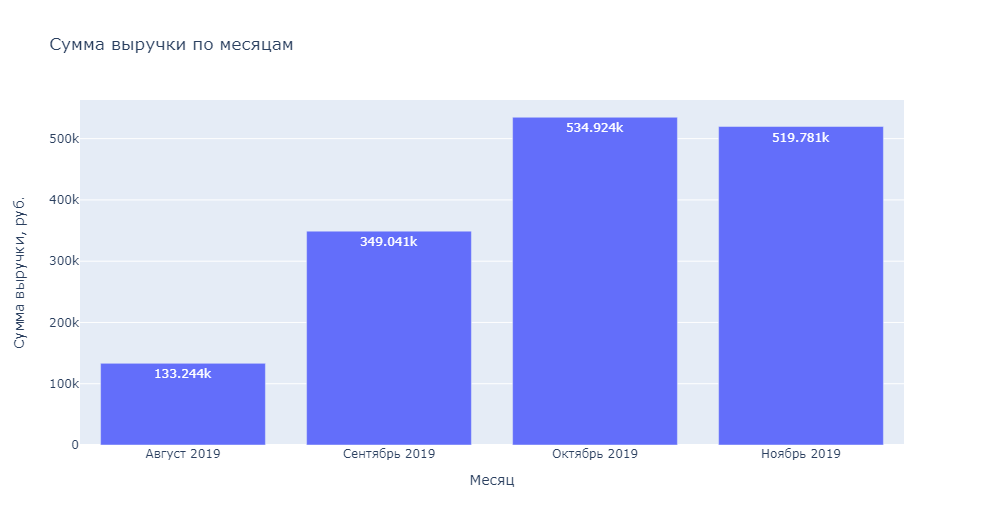

Выручка выросла с августа по октябрь со 133 тыс. руб. до почти 535 тыс. руб., однако в ноябре выручка немного сократилась (примерно на 15 тыс. рублей). Вполне вероятно, что до конца месяца выручка сравняется с октябрьской, ведь данные для анализа у нас только по 27.11.2019.

### Расчёт выручки компании при переводе клиентов на более оптимальные тарифы

Выручку компании при условии более выгодных тарифов также имеет смысл рассчитать на основании выручки за ноябрь, как для наиболее полного и актуального месяца. Возьмём из таблицы **revenue** необходимые для анализа столбцы:

In [100]:
new_revenue = revenue[['user_id', 'revenue_nov']]
new_revenue = new_revenue[new_revenue['revenue_nov'] > 0]
new_revenue.head()

user_id  revenue_nov
0    166377       3160.0
5    166405       6186.0
7    166406       2592.0
10   166407       5755.0
13   166485       4156.0

И добавим к таблице столбец с расходами активных клиентов на рекомендованных тарифах. Расходы клиентов и выручка компании - одно и то же значение. Столбец переименуем в соответствующий по смыслу:

In [101]:
new_revenue = new_revenue.merge(tariff_diff[['user_id', 'recommend_costs']], on = 'user_id', how = 'left')
new_revenue = new_revenue.rename(columns = {'recommend_costs': 'new_revenue'})
new_revenue.head()

user_id  revenue_nov  new_revenue
0   166377       3160.0       2465.0
1   166405       6186.0          NaN
2   166406       2592.0       1749.0
3   166407       5755.0       2768.0
4   166485       4156.0       3818.0

Все пропуски в столбце **new_revenue** заменим на значения столбца **revenue_nov**, так как для клиентов, которым мы не предлагаем смену тарифа, расходы останутся теми же, а значит, и выручка компании от этих клиентов будет прежней:

In [102]:
for i in range(len(new_revenue)):
    if pd.isna(new_revenue['new_revenue'][i]):
        new_revenue['new_revenue'][i] = new_revenue['revenue_nov'][i]
        
new_revenue.head()

user_id  revenue_nov  new_revenue
0   166377       3160.0       2465.0
1   166405       6186.0       6186.0
2   166406       2592.0       1749.0
3   166407       5755.0       2768.0
4   166485       4156.0       3818.0

Также добавим столбцы с расчётом разницы в абсолютных и относительных значениях:

In [103]:
new_revenue['diff'] = new_revenue['revenue_nov'] - new_revenue['new_revenue']
new_revenue['diff_%'] = round(100 - new_revenue['new_revenue'] * 100 / new_revenue['revenue_nov'], 2)

new_revenue.head()

user_id  revenue_nov  new_revenue    diff  diff_%
0   166377       3160.0       2465.0   695.0   21.99
1   166405       6186.0       6186.0     0.0    0.00
2   166406       2592.0       1749.0   843.0   32.52
3   166407       5755.0       2768.0  2987.0   51.90
4   166485       4156.0       3818.0   338.0    8.13

Посмотрим на общую выручку ноября, общую прогнозируемую выручку с учётом смены тарифов, общую разницу в выручке в рублях и в процентах:

In [104]:
display(f'Общая выручка за ноябрь 2019: {new_revenue["revenue_nov"].sum()} руб.')
display(f'Общая выручка за месяц при смене тарифов: {new_revenue["new_revenue"].sum()} руб.')
display(f'Разница в выручке в рублях: {new_revenue["diff"].sum()} руб.')
display(f'Разница в выручке в процентах: {(100 - new_revenue["new_revenue"].sum() * 100 / new_revenue["revenue_nov"].sum()):.2f}%')

'Общая выручка за ноябрь 2019: 519781.0 руб.'

'Общая выручка за месяц при смене тарифов: 459103.0 руб.'

'Разница в выручке в рублях: 60678.0 руб.'

'Разница в выручке в процентах: 11.67%'

И визуализируем:

In [105]:
px.bar(x = ['Ноябрь 2019', 'При смене тарифа'],
       y = [new_revenue['revenue_nov'].sum(), new_revenue['new_revenue'].sum()],
       title = 'Разница в выручке при смене тарифов активных клиентов',
      text_auto = True,
      labels = {'x': 'Вид выручки',
               'y': 'Выручка, руб.'})

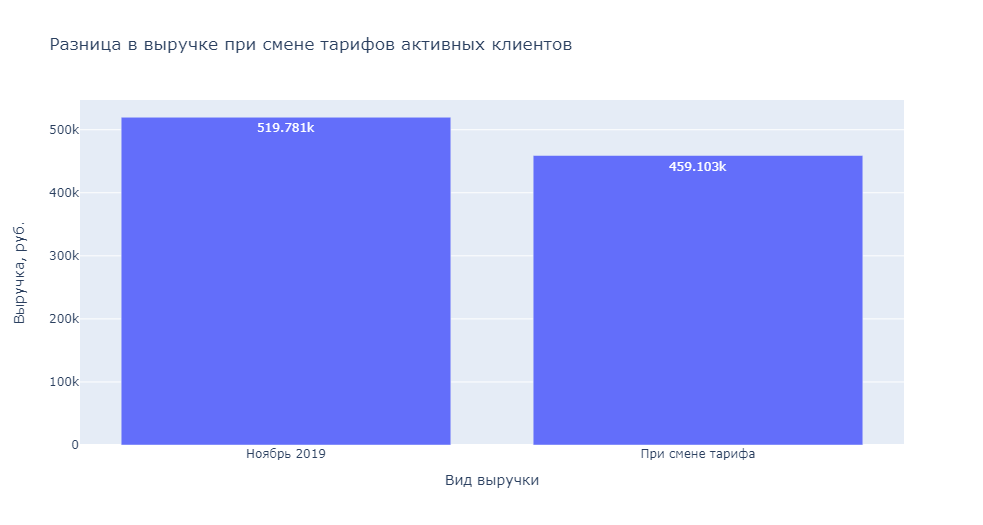

### Промежуточный вывод

1. Клиенты совершают в три раза больше исходящих звонков, чем входящих (75,5% против 24,5%);
2. Длительность исходящих вызовов также выше, но уже почти в 4 раза (78,2% против 21,8%) выше, чем длительность входящих;
3. Почти все вызовы в анализируемом периоде являются внешними - внутренних вызовов всего 1,82%;
4. Распределение длительности показывает примерно ту же пропорцию: длительность внутренних вызовов - всего 1,26%;
5. Абсолютное большинство операторов совершило и приняло за анализируемый период до 500 вызовов, большинство операторов "проговорили" до 500 000 секунд;
6. Большинство клиентов (74,4%) работают с количеством операторов до 10;
7. Коэффициент корреляции 0.5 говорит о том, что линейная связь между количеством операторов и общим количеством звонков клиентов - слабая. Количество исходящих звонков зависит от количества операторов ещё слабее - данном случае коэффициент ещё меньше (0.43).
7. Активными клиентами были признаны клиенты, которые попали в пересечение топ-100 по количеству вызовов и топ-100 по длительности вызовов. В категорию активных клиентов попали клиенты с разным количеством операторов, хотя доля группы "до 10 включительно" заметно сократилась - с 74,4% до 62,4%;
8. Расходы большей части клиентов за четыре месяца в сумме не превышают 10 000 руб., хотя есть и один клиент, который принёс компании в сумме почти 60 000 руб.;
9. Общая сумма расходов активных клиентов ожидаемо растёт от месяца к месяцу (т.к. дата первой регистрации в полученных нами данных совпадает с датой начала фиксации вызовов) - в августе она составила почти 80 тыс. руб., а к ноябрю достигла почти 341 тыс. руб.;
10. В основном активные клиенты используют тариф C - это около 44,2% от общего числа клиентов. Наименьшей же популярностью пользуется тариф А - его используют 18,6% клиентов;
11. Больше половины клиентов (53,5%) используют не самый оптимальный для себя тариф;
12. Всего для двоих клиентов тариф В оптимален, и всего для 1 - тариф А оптимален. Тариф С не оптимален для одного клиента;
13. Наиболее часто невыгодным тарифом для активных клиентов является тариф В - в 65,2% случаев. Тариф С является наименее выгодным всего в 2,17% случаев;
14. В случае перевода активных пользователей на самый оптимальный тариф 91,3% пользователей будут использовать тариф С, тариф А фигурировать не будет. Это может негативно сказаться на выручке компании;
15. При предложении более оптимального вместо самого выгодного тарифа доля тарифов В увеличится с 8,7 до 30,4%;
16. Выручка от предоставления услуг большей части клиентов не превышает 5000 руб. за четыре анализируемых месяца;
17. Выручка выросла с августа по октябрь со 133 тыс. руб. до почти 535 тыс. руб., однако в ноябре выручка немного сократилась (примерно на 15 тыс. рублей). Вполне вероятно, что до конца месяца выручка сравняется с октябрьской, ведь данные для анализа у нас только по 27.11.2019;
18. При смене тарифов активных клиентов при условии потребления услуг аналогичном ноябрю выручка компании снизится на 60678 руб. или 11,67%.

## Статистический анализ данных

### Проверка гипотез

Проверим следующую гипотезу:

**Н<sub>0</sub>: средняя длительность исходящих звонков на тарифе А равна средней длительности исходящих звонков на тарифе С.**

Н<sub>1</sub>: средняя длительность исходящих звонков на тарифе А и средняя длительность исходящих звонков на тарифе С не равны.

В качестве α примем 0,05.

Установим параметр equal_var = False на случай, если дисперсии выборок разные - так тест рассчитает дисперсии по отдельности.

In [106]:
calls_tariffs = calls.merge(clients, on = 'user_id', how = 'left')

In [107]:
out_A = calls_tariffs[(calls_tariffs['direction'] == 'out') & (calls_tariffs['tariff_plan'] == 'A')]['total_call_duration']
out_C = calls_tariffs[(calls_tariffs['direction'] == 'out') & (calls_tariffs['tariff_plan'] == 'C')]['total_call_duration']

alpha = 0.05

results = st.ttest_ind(out_A, out_C, equal_var = False)

display(f'P-value: {results.pvalue}')

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу ')

'P-value: 4.159136712045839e-77'

'Отвергаем нулевую гипотезу'

Значение p-value настолько мало, что даже если бы мы приняли α = 0,01, гипотеза была бы отвергнута.

**Вывод: средняя длительность исходящих звонков на тарифе А и средняя длительность исходящих звонков на тарифе С не равны.**

Проверим следующую гипотезу:

**Н<sub>0</sub>: средняя длительность исходящих звонков клиентов с количеством операторов до 10 включительно равна средней длительности исходящих звонков клиентов с количеством операторов более 41 включительно.**

Н<sub>1</sub>: средняя длительность исходящих звонков клиентов с количеством операторов до 10 включительно и средняя длительность исходящих звонков с количеством операторов более 41 включительно не равны.

В качестве α примем 0,05.

Установим параметр equal_var = False на случай, если дисперсии выборок разные - так тест рассчитает дисперсии по отдельности.

In [108]:
calls_operators = calls.merge(clients_operators, on = 'user_id', how = 'left')

In [109]:
out_min_operators = calls_operators[(calls_operators['direction'] == 'out') & 
                                    (calls_operators['category'] == 'до 10 включительно')]['total_call_duration']
out_max_operators = calls_operators[(calls_operators['direction'] == 'out') & 
                                    (calls_operators['category'] == 'от 39 до 48 включительно')]['total_call_duration']
alpha = 0.05

results = st.ttest_ind(out_min_operators, out_max_operators, equal_var = False)

display(f'P-value: {results.pvalue}')

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу ')

'P-value: 2.326702437955048e-77'

'Отвергаем нулевую гипотезу'

Для этой гипотезы значение p-value также мало настолько, что даже если бы мы приняли α = 0,01, гипотеза была бы отвергнута.

**Вывод: средняя длительность исходящих звонков клиентов с количеством операторов до 10 включительно и средняя длительность исходящих звонков с количеством операторов более 39 включительно не равны.**

### Промежуточный вывод

1. Средняя длительность исходящих звонков на тарифе А и средняя длительность исходящих звонков на тарифе С не равны;
2. Средняя длительность исходящих звонков клиентов с количеством операторов до 10 включительно и средняя длительность исходящих звонков с количеством операторов более 39 включительно не равны.

## Выводы и рекомендации

### Выводы

1. В таблице с данными о звонках обнаружено значительное количество дубликатов (9,1%, 4900 строк). Возникновение дубликатов, возможно, связано с ошибками записи данных при агрегировании;
2. Также в одном из столбцов таблицы (**operator_id**) обнаружено большое количество пропусков - 15,22% (или 7456 строк **после удаления дубликатов**). Большая часть из них относится ко входящим внутренним пропущенным вызовам, данные пропуски не повлияют на расчёт затрат абонентов и выручки компании;
3. В столбце **internal** также зафиксированы пропуски, хотя их и значительно меньше (110 строк, что составляет 0,22% от общего количества данных **после удаления пропусков**);
4. После обработки дубликатов доля пропусков почти не изменилось - это говорит о том, что дублировались строки как с пропусками, так и без них.
5. В таблице существуют операторы, длительность звонков которых оказалась значительно больше суток. Возможны ошибки записи или агрегации информации. **Стоит составить баг-репорт**. Идентификаторы операторов, на информацию по которым необходимо обратить внимание: **885876, 885890, 925922**.
6. Клиенты совершают в три раза больше исходящих звонков, чем входящих (75,5% против 24,5%);
7. Длительность исходящих вызовов также выше, но уже почти в 4 раза (78,2% против 21,8%) выше, чем длительность входящих;
8. Почти все вызовы в анализируемом периоде являются внешними - внутренних вызовов всего 1,82%;
9. Распределение длительности показывает примерно ту же пропорцию: длительность внутренних вызовов - всего 1,26%;
10. Абсолютное большинство операторов совершило и приняло за анализируемый период до 500 вызовов, большинство операторов "проговорили" до 500 000 секунд;
11. Большинство клиентов (74,4%) работают с количеством операторов до 10;
12. Коэффициент корреляции 0.5 говорит о том, что линейная связь между количеством операторов и общим количеством звонков клиентов - слабая. Количество исходящих звонков зависит от количества операторов ещё слабее - данном случае коэффициент ещё меньше (0.43).
13. Активными клиентами были признаны клиенты, которые попали в пересечение топ-100 по количеству вызовов и топ-100 по длительности вызовов. В категорию активных клиентов попали клиенты с разным количеством операторов, хотя доля группы "до 10 включительно" заметно сократилась - с 74,4% до 62,4%;
14. Расходы большей части клиентов за четыре месяца в сумме не превышают 10 000 руб., хотя есть и один клиент, который принёс компании в сумме почти 60 000 руб.;
15. Общая сумма расходов активных клиентов ожидаемо растёт от месяца к месяцу (т.к. дата первой регистрации в полученных нами данных совпадает с датой начала фиксации вызовов) - в августе она составила почти 80 тыс. руб., а к ноябрю достигла почти 341 тыс. руб.;
16. В основном активные клиенты используют тариф C - это около 44,2% от общего числа клиентов. Наименьшей же популярностью пользуется тариф А - его используют 18,6% клиентов;
17. Больше половины клиентов (53,5%) используют не самый оптимальный для себя тарифф;
18. Всего для двоих клиентов тариф В оптимален, и всего для 1 - тариф А оптимален. Тариф С не оптимален для одного клиента;
19. Наиболее часто невыгодным тарифом для активных клиентов является тариф В - в 65,2% случаев. Тариф С является наименее выгодным всего в 2,17% случаев;
20. В случае перевода активных пользователей на самый оптимальный тариф 91,3% пользователей будут использовать тариф С, тариф А фигурировать не будет. Это может негативно сказаться на выручке компании;
21. При предложении более оптимального вместо самого выгодного тарифа доля тарифов В увеличится с 8,7 до 30,4%;
22. Выручка от предоставления услуг большей части клиентов не превышает 5000 руб. за четыре анализируемых месяца;
23. Выручка выросла с августа по октябрь со 133 тыс. руб. до почти 535 тыс. руб., однако в ноябре выручка немного сократилась (примерно на 15 тыс. рублей). Вполне вероятно, что до конца месяца выручка сравняется с октябрьской, ведь данные для анализа у нас только по 27.11.2019;
24. При смене тарифов активных клиентов при условии потребления услуг аналогичном ноябрю выручка компании снизится на 60699 руб. или 11,68%.
25. Средняя длительность исходящих звонков на тарифе А и средняя длительность исходящих звонков на тарифе С не равны;
26. Средняя длительность исходящих звонков клиентов с количеством операторов до 10 включительно и средняя длительность исходящих звонков с количеством операторов более 39 включительно не равны.

### Рекомендации

Рекомендуемые тарифы для активных клиентов, минимизирующие потери компании, в выгрузке по ссылке: https://docs.google.com/spreadsheets/d/1huuLvKwSYR9_PXkfPKmIjTC93MQu7rG2/edit?usp=sharing&ouid=100386371217527628149&rtpof=true&sd=true

Даже клиенты с самой большой длительностью исходящих внутренних вызовов не доходят до лимита в 2000 минут. Всего два клиента за весь анализируемый период перешагнули порог в 1000 минут, ещё два - порог в 500 минут.

Рекомендация: снизить лимит бесплатных внутренних исходящих вызовов.